#  Frame Decomposer

In [ ]:

"""
Auther: Suresh
email: suresh@cogknit.com
"""
import cv2,time
class _video_reader(object):
    def __init__(self, video_file):
        self.video_file = video_file

    def __enter__(self):
        cap = cv2.VideoCapture(self.video_file)
        ret, frame = cap.read()  # can you read the source ?
        assert ret == True, "Video read error {}".format(self.video_file)
        cap.set(1, 0)  # set it back to read first frame
        self.cap = cap
        return cap

    def __exit__(self, type, value, traceback):
        ''' TODO: Something intelligent if error occurs '''
        self.cap.release()
        return


class VideoObject(object):

    def __init__(self, video_file):
        self.file_path = video_file

    def get_frames(self, F=None):
        '''
        Get frames of a video one after the other as a list(generator)
        '''
        with _video_reader(self.file_path) as cap:
            ret, frame = cap.read()
            while ret:
                yield F(frame) if F else frame
                ret, frame = cap.read()

    def pull_frames(self, frame_numbers=[], F=None):
        '''
        Get some specific frames of the video as a list(generator)
        '''
        with _video_reader(self.file_path) as cap:
            for frame_number in frame_numbers:
                cap.set(1, frame_number)
                ret, frame = cap.read()
                if ret:
                    yield F(frame) if F else frame

    @property
    def fps(self):
        with _video_reader(self.file_path) as cap:
            fps = cap.get(cv2.CAP_PROP_FPS)
            return fps

    @property
    def width(self):
        with _video_reader(self.file_path) as cap:
            fps = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
            return fps

    @property
    def height(self):
        with _video_reader(self.file_path) as cap:
            fps = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
            return fps

    @property
    def length(self):
        # total no of frames
        with _video_reader(self.file_path) as cap:
            f_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
            return int(f_count)

    def __len__(self):
        return self.length






In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
%matplotlib inline

path="/home/gpu-machine/projects/rnpd/media/uploaded_media/b27a3f7bf17e4863a43f3a5dc9d0e6e8.mp4"
vid = VideoObject(path)
lists = list(vid.pull_frames([20]))
print(type(lists[0]))

input_image = Image.fromarray(lists[0])
temp_save_image="/home/gpu-machine/projects/rnpd/media/temp_save/test.jpg"
input_image.save(temp_save_image)
imshow(input_image)


# Number plate recognition

/home/gpu-machine/projects/dataset/Test_image/123/frame31.jpg
(1920, 1080)


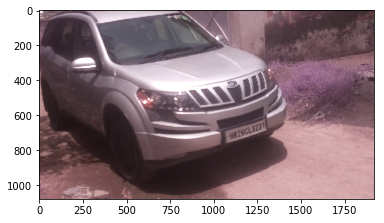

['1057', '1323', '616', '776']


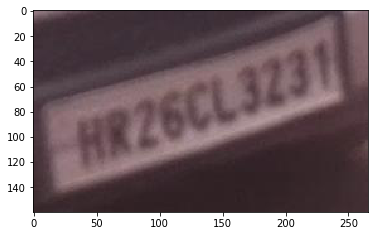

 GaandFaad_NumberPlate DETECTED ------> 
1 /home/gpu-machine/projects/dataset/Test_image/123/frame47.jpg
(1920, 1080)


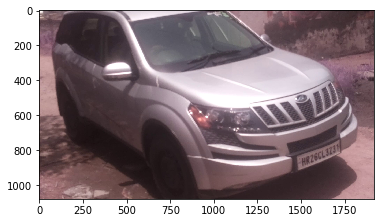

['1475', '1745', '751', '914']


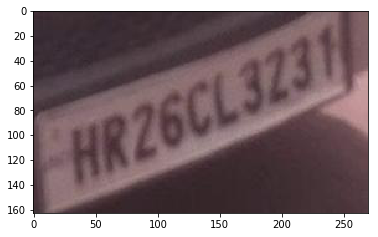

 GaandFaad_NumberPlate DETECTED ------> 
2 /home/gpu-machine/projects/dataset/Test_image/123/frame27.jpg
(1920, 1080)


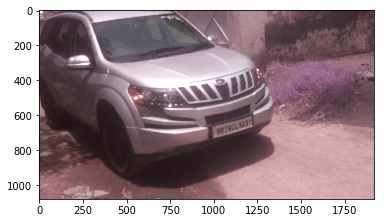

['969', '1245', '605', '740']


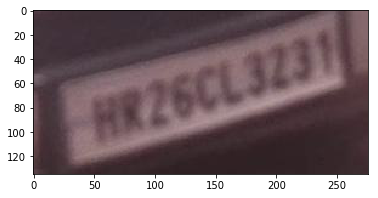

 GaandFaad_NumberPlate DETECTED ------> 
3 /home/gpu-machine/projects/dataset/Test_image/123/frame23.jpg
(1920, 1080)


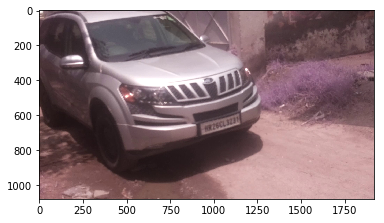

['919', '1160', '591', '733']


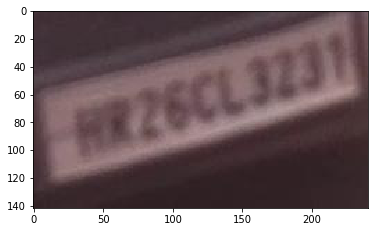

 GaandFaad_NumberPlate DETECTED ------> 
4 /home/gpu-machine/projects/dataset/Test_image/123/frame35.jpg
(1920, 1080)


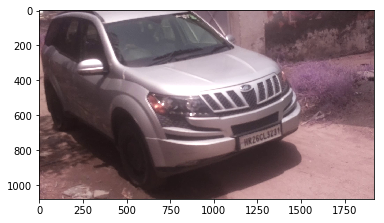

['1147', '1392', '656', '807']


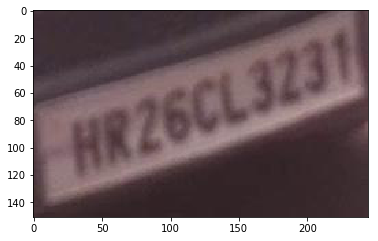

 GaandFaad_NumberPlate DETECTED ------> 
5 /home/gpu-machine/projects/dataset/Test_image/123/frame51.jpg
(1920, 1080)


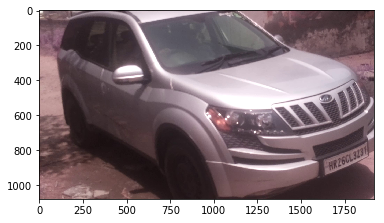

['1631', '1907', '767', '947']


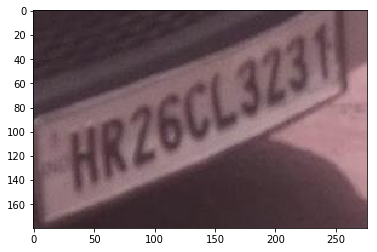

 GaandFaad_NumberPlate DETECTED ------> 
6 /home/gpu-machine/projects/dataset/Test_image/123/frame39.jpg
(1920, 1080)


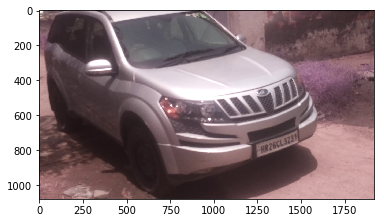

['1223', '1507', '687', '854']


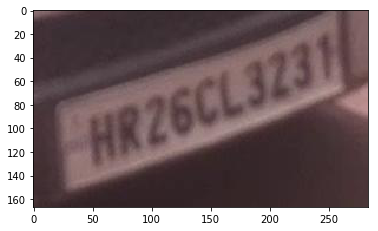

 GaandFaad_NumberPlate DETECTED ------> 


In [17]:
# import the necessary packages
import os
import cv2
import argparse
#import pytesseract
from PIL import Image
import glob,sys
import matplotlib.pyplot as plt
import numpy as np
import subprocess
#path='/home/gpu-machine/combined_data/4frame48.jpg'

def get_rnpd(impath):

    p = subprocess.Popen(["./darknet", "detector", "test", "cfg/obj.data", "cfg/yolo-obj.cfg", "yolo-obj.weights ", impath], stdout=subprocess.PIPE)
    pr=p.communicate()
    input_image = Image.open(impath)
    print(input_image.size)
    plt.imshow(input_image)
    plt.show()

    #input_image = input_image.resize((1024, 720), Image.ANTIALIAS)
    coordinates = []

    with open('/home/gpu-machine/projects/rnpd/object_detection/result_coordinate.txt') as file:
        for items in file:
            coordinates=items.split(' ')
            print(coordinates)
            break



    #print(coordinates)
    #print(" Coordinates Extracted ")
    cropped_image = input_image.crop((int(coordinates[0]), int(coordinates[2]), int(coordinates[1]), int(coordinates[3])))
    save_path="/home/gpu-machine/projects/dataset/Test_image/45/crop/"+os.path.split(impath)[-1]
    cropped_image.save(save_path)
    image = Image.open(save_path)
    #image = cv2.imread(save_path)
    plt.imshow(image)
    plt.show()

    print(" GaandFaad_NumberPlate DETECTED ------> ")
    return ""

if __name__=="__main__":
#         path='/home/gpu-machine/rnpd/darknet_gpu/test.txt'
#         with open(path,'r') as f:
#             image_list=f.read().split('\n')
        image_list=glob.glob("/home/gpu-machine/projects/dataset/Test_image/123/*.jpg")
        count=0
        
        for i in range(len(image_list)):
            print(image_list[i])
            get_rnpd(image_list[i])
            count+=1
            if count==7:
                break
            print(count,end=' ')
#         temp_save_image="/home/gpu-machine/projects/dataset/Test_image/109/frame39.jpg"
#         get_rnpd(temp_save_image)


# CLean data for training

In [ ]:
from shutil import copyfile
import glob,os
# copyfile(src, dst)
src="/home/cogknit/experiments/dataset/new_900_dataset_label/001/001/"
dst="/home/cogknit/experiments/dataset/clean_label_660/"
im_src="/home/cogknit/experiments/dataset/900_dataset_crop/"
im_dst="/home/cogknit/experiments/dataset/final_dataset_crop_660/"

labe_data=glob.glob(src+'*.txt')
count=0
for i in labe_data:
    name=os.path.split(i)[-1].split('.')[0]
    #print(name)
    #copyfile(src+name+'.jpg', dst+name+'.jpg')
    #copyfile(i, dst+name+'.txt')

    with open(i) as f:
        content = f.readlines()
        content = [x.strip() for x in content] 
        if  content and content[0][0]=='1':
            count+=1
            #print("adada: ",content)
            copyfile(im_src+name+'.jpg', im_dst+name+'.jpg')
            #copyfile(src+name+'.label', dst+name+'.label')
print(count)
    

/home/gpu-machine/projects/rnpd/media/frames/thumb0017.jpg


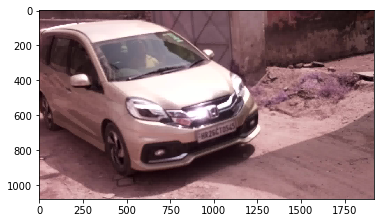

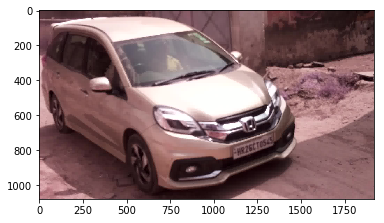

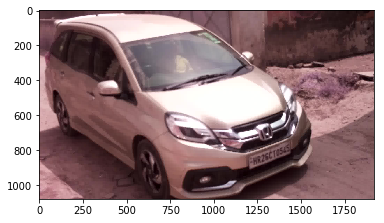

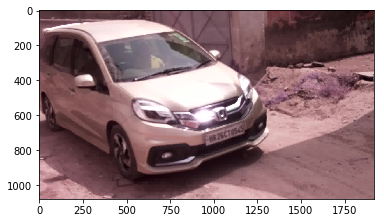

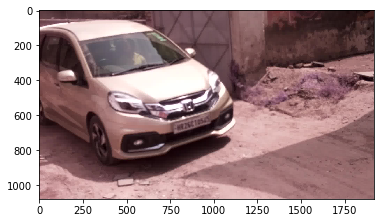

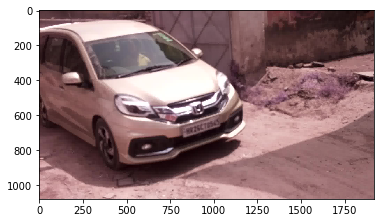

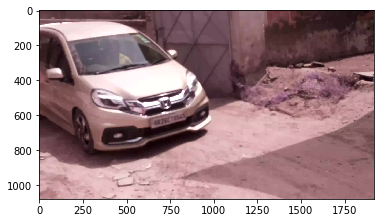

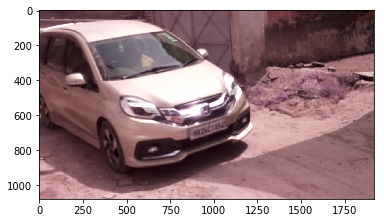

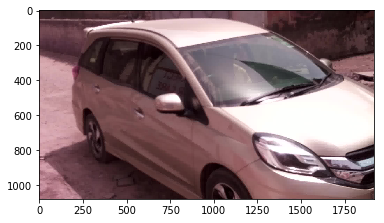

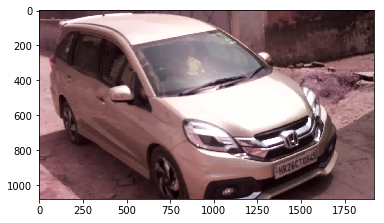

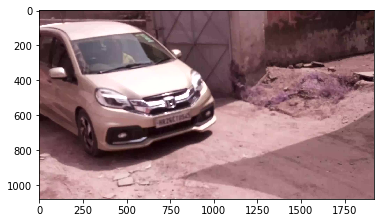

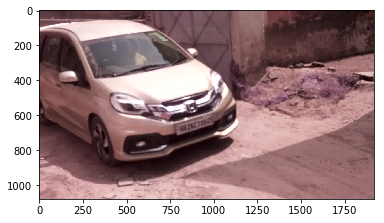

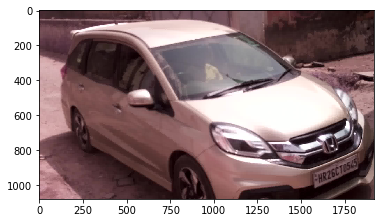

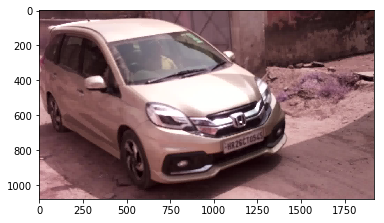

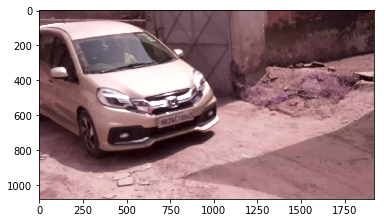

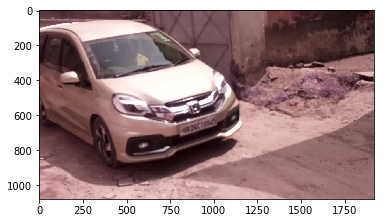

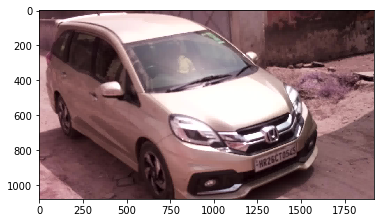

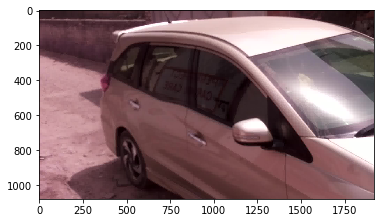

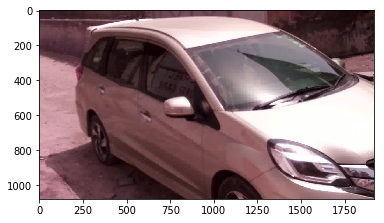

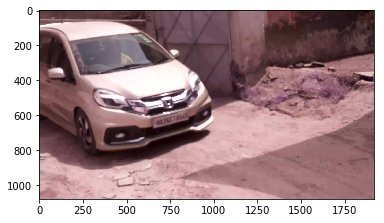

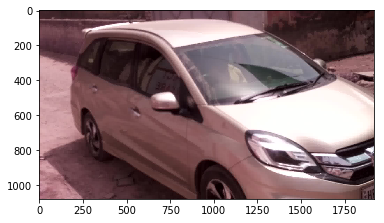

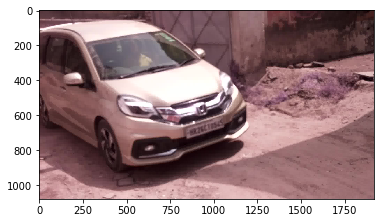

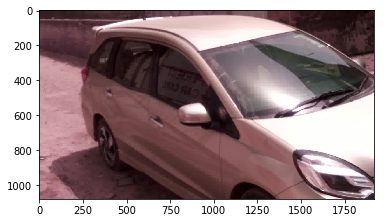

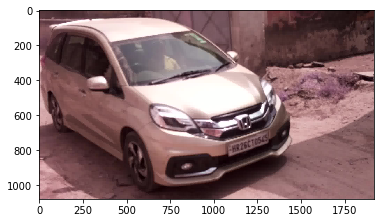

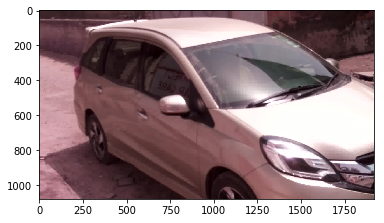

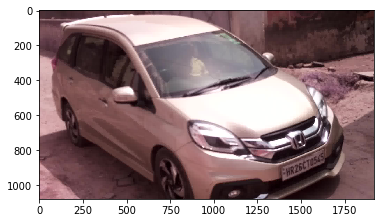

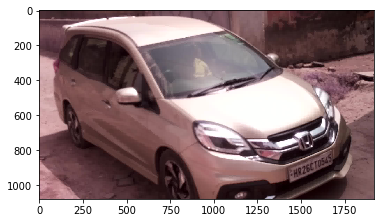

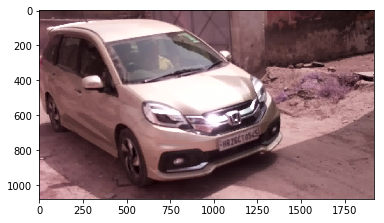

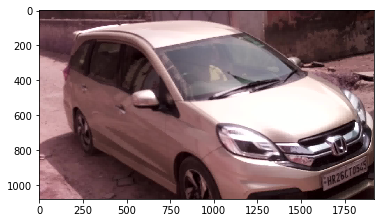

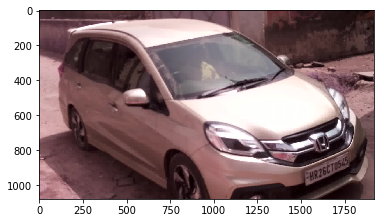

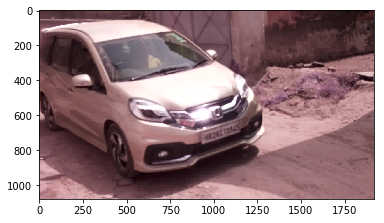

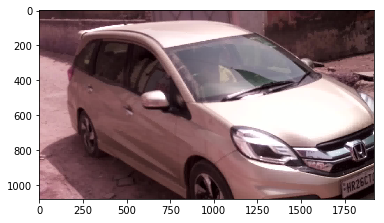

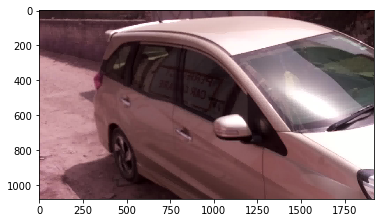

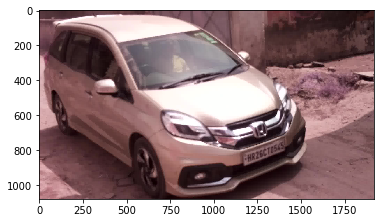

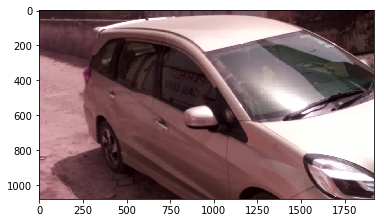

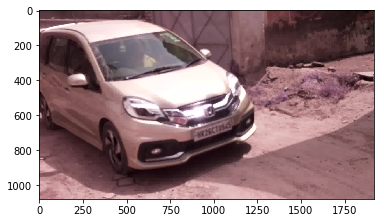

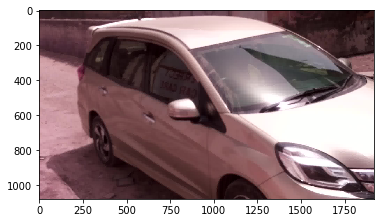

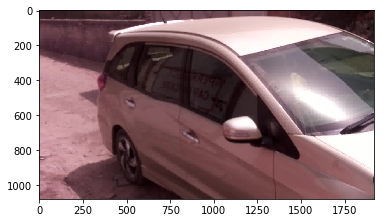

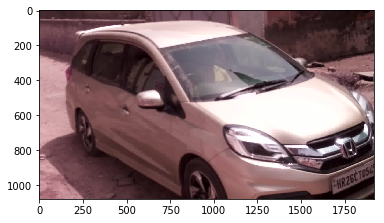

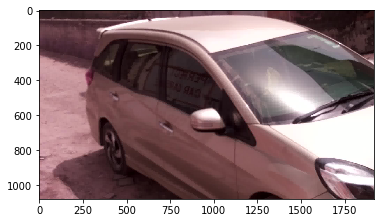

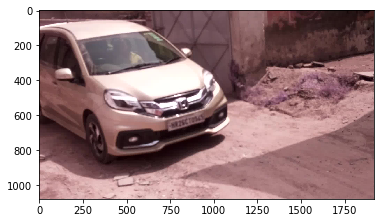

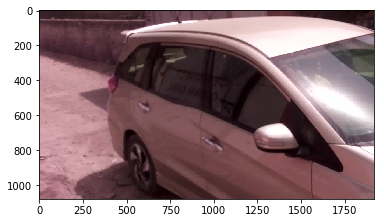

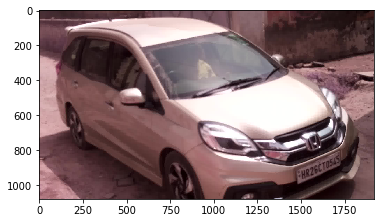

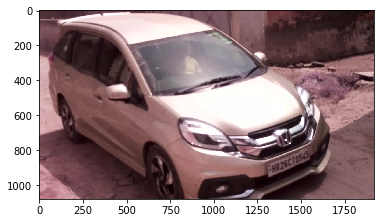

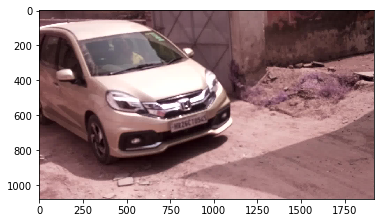

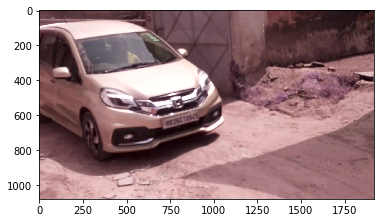

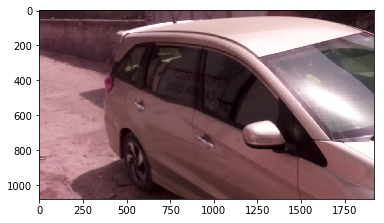

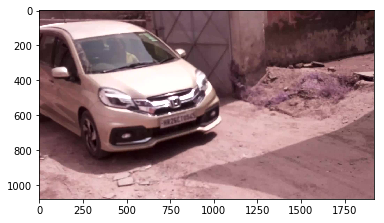

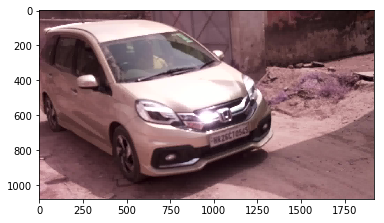

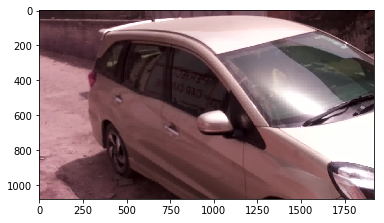

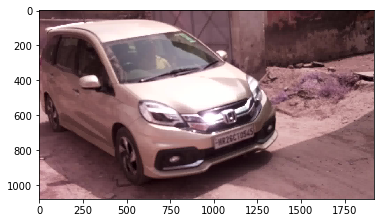

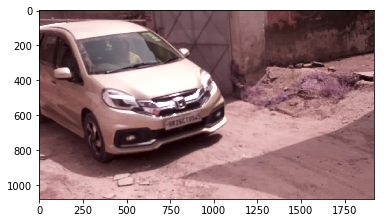

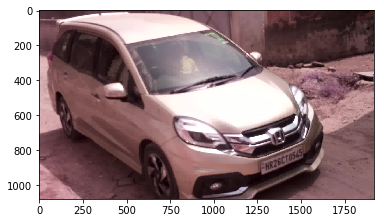

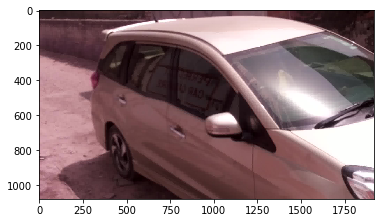

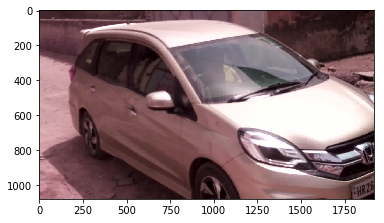

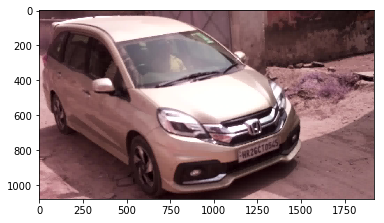

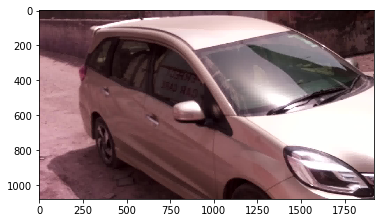

In [7]:
import glob,os,time
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
path="/home/gpu-machine/projects/rnpd/media/frames/"
l=glob.glob(path+'*.jpg')
print(l[0])

try:
    for i in l[:100]:

        img = Image.open(i) # open the image file
        #print(img.verify()) # verify that it is, in fact an image
        arr = np.asarray(img)
        plt.imshow(arr, cmap='gray')
        plt.show()

except (IOError, SyntaxError) as e:
    print('Bad file:', filename) # print out the names of corrupt files

# Crop bbx image for crrn trainging

In [5]:
import glob,os,time,sys
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt
label_path="/home/gpu-machine/projects/dataset/rnpd_image_dataset_3477_yolo/"
im_path="/home/gpu-machine/projects/dataset/rnpd_image_dataset_3477_yolo/"

image_pa=glob.glob(im_path+"*.jpg")
lable_pa=glob.glob(label_path+"*.txt")
print(len(image_pa),len(lable_pa))
count=0
for i in range(len(image_pa)):
    filename=image_pa[i].split('.')[0].split('/')[-1]
    print(filename)
    with open(label_path+filename+'.txt','r') as f:
        coordinates=f.readlines()
        print(coordinates[0].strip('\n').split(' ')[1:])
    coordinates=[float(i) for i in coordinates[0].strip('\n').split(' ')[1:]]
    
    #sys.exit()
    impath=im_path+filename+".jpg"
    if im_path+filename+".jpg"==''
    input_image = Image.open(impath)
    print(input_image.size)
    w=input_image.size[0]
    h=input_image.size[1]
    coordinate=[int(i) for i in [coordinates[0]*w-coordinates[2]*w/2, coordinates[1]*h-coordinates[3]*h/2, coordinates[0]*w+coordinates[2]*w/2, coordinates[1]*h+coordinates[3]*h/2]]
    print(coordinate)
    cropped_image = input_image.crop(coordinate)
    #cropped_image = input_image.crop((int(coordinates[0]), int(coordinates[1]), int(coordinates[2]), int(coordinates[3])))
    save_path="/home/gpu-machine/projects/dataset/crop_rnpd_image_dataset_3477/"+os.path.split(impath)[-1]
    cropped_image.save(save_path)
    count+=1
    print("count",count)
    #image = Image.open(save_path)
    #imshow(cropped_image)
    #plt.show()
    


3480 3480
set12_cc7b472593c94c98ad3fd2a80dab3a8d
['0.6216145833333333', '0.7416666666666667', '0.19427083333333334', '0.2574074074074074']
(1920, 1080)
[1007, 662, 1380, 940]
count 1
set2_4201f39c391944189252f975e186086a
['0.26588541666666665', '0.4620370370370371', '0.1359375', '0.12222222222222223']
(1920, 1080)
[380, 433, 641, 565]
count 2
frame825
['0.752864583333', '0.521296296296', '0.102604166667', '0.0888888888889']
(1920, 1080)
[1346, 514, 1543, 610]
count 3
frame822
['0.64921875', '0.324074074074', '0.1015625', '0.0666666666667']
(1920, 1080)
[1149, 313, 1344, 385]
count 4
set1_2fae7f23de914f358190c3d15c40ff7c
['0.796875', '0.46944444444444444', '0.19583333333333333', '0.16111111111111112']
(1920, 1080)
[1342, 420, 1718, 594]
count 5
set12_3a4338a932bf4d79945c308b008a53a7
['0.43124999999999997', '0.4953703703703704', '0.15833333333333333', '0.18703703703703706']
(1920, 1080)
[675, 434, 979, 636]
count 6
set12_dd7b387191fa4df192dd71b40d9d9f8a
['0.46770833333333334', '0.7856481

count 54
set9_36da6a1502cf47b091d39b6022a9e807
['0.26848958333333334', '0.5402777777777777', '0.16302083333333334', '0.11388888888888889']
(1920, 1080)
[359, 522, 672, 645]
count 55
set12_c732a30e88e749488d6fc8afab1284a3
['0.33880208333333334', '0.1513888888888889', '0.1546875', '0.08240740740740742']
(1920, 1080)
[502, 119, 799, 208]
count 56
set2_5a6c3f29d5894aec8b8c5a067edf29a3
['0.6416666666666666', '0.7194444444444444', '0.17395833333333333', '0.17222222222222222']
(1920, 1080)
[1065, 684, 1399, 870]
count 57
frame705
['0.7828125', '0.668518518519', '0.113541666667', '0.0925925925926']
(1920, 1080)
[1393, 672, 1612, 772]
count 58
set11_319ea79d8c70460fa12731c00982a224
['0.17630208333333333', '0.13935185185185187', '0.13177083333333334', '0.0787037037037037']
(1920, 1080)
[212, 108, 465, 193]
count 59
frame602
['0.57109375', '0.348611111111', '0.127604166667', '0.0935185185185']
(1920, 1080)
[973, 325, 1219, 426]
count 60
set12_b395e53d471b4191a7a9bb6bde0c8c67
['0.7270833333333333'

count 107
set5_cb7bd54c477a47bbaf8edd3dba6b941c
['0.7044270833333334', '0.6828703703703703', '0.19322916666666667', '0.17314814814814816']
(1920, 1080)
[1167, 644, 1538, 831]
count 108
frame858
['0.771614583333', '0.626851851852', '0.1109375', '0.0944444444444']
(1920, 1080)
[1374, 626, 1587, 728]
count 109
frame459
['0.793229166667', '0.606481481481', '0.113541666667', '0.105555555556']
(1920, 1080)
[1414, 597, 1632, 711]
count 110
set1_183d60f5ecbd4fcc89bada2c684ba173
['0.3671875', '0.4185185185185185', '0.14479166666666665', '0.11296296296296297']
(1920, 1080)
[566, 391, 844, 513]
count 111
frame742
['0.759895833333', '0.39212962963', '0.113541666667', '0.102777777778']
(1920, 1080)
[1349, 368, 1567, 479]
count 112
set1_9e6dd609faf549309ce3f54454bfd6bf
['0.7588541666666666', '0.35462962962962963', '0.178125', '0.16111111111111112']
(1920, 1080)
[1286, 296, 1628, 470]
count 113
set4_bd3d4ef4841140dba08f1adcbad86ed3
['0.41822916666666665', '0.1962962962962963', '0.13854166666666667', 

count 160
set8_7a1a145b65e34739aadc3ea74e397a5c
['0.4434895833333333', '0.2898148148148148', '0.17239583333333333', '0.16111111111111112']
(1920, 1080)
[686, 226, 1017, 400]
count 161
set11_bb5cc07f5b714dc9b616e5da02bc344b
['0.4421875', '0.17824074074074076', '0.15416666666666667', '0.11574074074074074']
(1920, 1080)
[701, 130, 997, 255]
count 162
set8_1c4d0efe840c4ca3a76d3777a4527a2b
['0.69453125', '0.500925925925926', '0.20364583333333333', '0.2111111111111111']
(1920, 1080)
[1138, 427, 1529, 655]
count 163
set8_a7e1ad8a56994481b3aa6d6d6515601b
['0.44427083333333334', '0.28703703703703703', '0.16354166666666667', '0.17222222222222222']
(1920, 1080)
[696, 217, 1010, 403]
count 164
frame834
['0.64765625', '0.485648148148', '0.0994791666667', '0.0898148148148']
(1920, 1080)
[1147, 475, 1339, 572]
count 165
set3_f573d88b37d042268c2a2448ef1ec830
['0.6473958333333333', '0.7000000000000001', '0.17604166666666665', '0.1574074074074074']
(1920, 1080)
[1074, 671, 1412, 841]
count 166
frame782


count 214
set8_076d65afa8f54f189259c347f58155ea
['0.3768229166666667', '0.31157407407407406', '0.16822916666666665', '0.15092592592592594']
(1920, 1080)
[562, 255, 885, 418]
count 215
set2_1be71519507b404498f11deacd3135fa
['0.7203125', '0.7027777777777778', '0.165625', '0.1462962962962963']
(1920, 1080)
[1224, 680, 1542, 838]
count 216
set4_2b6f163f438d4e7b84647bb391fe5629
['0.4869791666666667', '0.7435185185185186', '0.165625', '0.19814814814814816']
(1920, 1080)
[776, 696, 1094, 910]
count 217
set9_a727c4ff48a84aca8ad4922493c4b72a
['0.32786458333333335', '0.26805555555555555', '0.14947916666666666', '0.10092592592592593']
(1920, 1080)
[486, 235, 773, 344]
count 218
set9_09bf805c14934f12b0ea9ea90634e253
['0.3971354166666667', '0.22083333333333335', '0.15572916666666667', '0.13611111111111113']
(1920, 1080)
[613, 165, 912, 312]
count 219
set4_493a30f3860a4161b2a899ddf9191604
['0.4453125', '0.47685185185185186', '0.12291666666666666', '0.14444444444444446']
(1920, 1080)
[737, 437, 973, 

count 264
set4_86e74040caea4c11a289c7c0872d173e
['0.32916666666666666', '0.7194444444444444', '0.2760416666666667', '0.3']
(1920, 1080)
[367, 615, 897, 939]
count 265
set2_947a5b91bdc6499b819c898086feb21e
['0.5192708333333333', '0.24953703703703706', '0.15520833333333334', '0.1175925925925926']
(1920, 1080)
[848, 206, 1146, 333]
count 266
frame818
['0.694791666667', '0.343055555556', '0.104166666667', '0.087962962963']
(1920, 1080)
[1234, 323, 1434, 418]
count 267
frame601
['0.58515625', '0.360648148148', '0.128645833333', '0.0916666666667']
(1920, 1080)
[1000, 339, 1246, 438]
count 268
set8_f77b47104b6a42cbb4d8d467c4962948
['0.5817708333333333', '0.8657407407407408', '0.19270833333333334', '0.20740740740740743']
(1920, 1080)
[932, 823, 1302, 1047]
count 269
set1_bb8c76b281734d028af1b8dec32c6f3b
['0.7369791666666666', '0.5407407407407407', '0.18645833333333334', '0.17777777777777778']
(1920, 1080)
[1236, 488, 1594, 680]
count 270
set12_6d8340d8fa604a0a935b7f01e53fa006
['0.5390625', '0.

count 318
frame6
['0.698177083333', '0.322222222222', '0.0963541666667', '0.0759259259259']
(1920, 1080)
[1247, 306, 1432, 388]
count 319
set5_a735265bacf6487f8e5aa8498a7d4d3b
['0.3736979166666667', '0.47453703703703703', '0.1953125', '0.19722222222222224']
(1920, 1080)
[530, 406, 905, 619]
count 320
set3_9b12827b5c164186ae214a8819ef8b9d
['0.72109375', '0.6560185185185186', '0.1796875', '0.17314814814814816']
(1920, 1080)
[1212, 615, 1557, 802]
count 321
frame830
['0.689583333333', '0.503703703704', '0.0979166666667', '0.0907407407407']
(1920, 1080)
[1229, 495, 1417, 593]
count 322
set2_78a6a89ed01d4703a93e2e6f193d8254
['0.66171875', '0.6981481481481482', '0.1703125', '0.19814814814814816']
(1920, 1080)
[1107, 647, 1434, 861]
count 323
frame285
['0.730729166667', '0.552777777778', '0.111458333333', '0.0703703703704']
(1920, 1080)
[1296, 559, 1510, 635]
count 324
set3_66673ee6562c454ca87d91130bddeeb0
['0.6825520833333333', '0.6736111111111112', '0.1984375', '0.19166666666666668']
(1920,

count 370
frame620
['0.647916666667', '0.503703703704', '0.0958333333333', '0.0759259259259']
(1920, 1080)
[1152, 503, 1336, 585]
count 371
set11_b3784919bcee4bec83ac619da342a800
['0.6385416666666667', '0.46805555555555556', '0.18541666666666667', '0.16574074074074074']
(1920, 1080)
[1048, 416, 1404, 595]
count 372
set5_8ebd137355a2461298e29a59130ebcbe
['0.7645833333333333', '0.6018518518518519', '0.16145833333333334', '0.17222222222222222']
(1920, 1080)
[1313, 557, 1623, 743]
count 373
set4_470db1e687024d1dbe9d24201f46fe46
['0.73984375', '0.6620370370370371', '0.19114583333333332', '0.24814814814814815']
(1920, 1080)
[1237, 581, 1604, 849]
count 374
set4_74f3cb162df9436483b72a4f93f56145
['0.53671875', '0.7106481481481481', '0.18385416666666665', '0.24537037037037038']
(1920, 1080)
[854, 635, 1207, 900]
count 375
set2_6698a3a4cddc44798194c15cf87f6582
['0.4309895833333333', '0.21944444444444444', '0.16197916666666667', '0.08703703703703704']
(1920, 1080)
[672, 190, 983, 284]
count 376
s

count 423
set3_6abd4bfebb1c422bb2b56fd1b7c6dd7e
['0.51484375', '0.6518518518518519', '0.19427083333333334', '0.17407407407407408']
(1920, 1080)
[802, 610, 1175, 798]
count 424
set5_fecc13ed493548639e0ecad1bc3ac8e0
['0.5778645833333333', '0.5777777777777778', '0.1515625', '0.1425925925925926']
(1920, 1080)
[964, 547, 1255, 701]
count 425
set2_e2064dc7eca649f58596f22eb02cfdc2
['0.4205729166666667', '0.7944444444444445', '0.15989583333333332', '0.12962962962962962']
(1920, 1080)
[654, 788, 961, 928]
count 426
set8_689125cc492f402e9a55c46a2e30d42f
['0.7010416666666667', '0.7069444444444445', '0.19895833333333332', '0.2712962962962963']
(1920, 1080)
[1155, 617, 1537, 910]
count 427
set9_d083b65b29534e6dad774ac0fec98375
['0.33880208333333334', '0.17453703703703705', '0.1484375', '0.13240740740740742']
(1920, 1080)
[508, 117, 793, 260]
count 428
set12_1b92dfc7ce334c5aa768ba7682aafb5a
['0.52734375', '0.48379629629629634', '0.2505208333333333', '0.28240740740740744']
(1920, 1080)
[772, 370, 125

count 476
set4_c53bdcb94a1c47968470d08bc3f5dd66
['0.4666666666666667', '0.7064814814814815', '0.159375', '0.17592592592592593']
(1920, 1080)
[743, 668, 1049, 858]
count 477
frame548
['0.685677083333', '0.588888888889', '0.1046875', '0.0925925925926']
(1920, 1080)
[1215, 586, 1416, 686]
count 478
set8_a13586f447184bb8a46fd495343ead8c
['0.31744791666666666', '0.09861111111111112', '0.13697916666666665', '0.11203703703703705']
(1920, 1080)
[478, 46, 741, 167]
count 479
set9_468b6e42a9844884bad42ce0124c4cca
['0.28671875', '0.1587962962962963', '0.14010416666666667', '0.10277777777777779']
(1920, 1080)
[416, 116, 685, 227]
count 480
set12_83f486ce5fce44878efca11e05a44d1b
['0.5489583333333333', '0.5800925925925926', '0.18125', '0.18425925925925926']
(1920, 1080)
[880, 527, 1228, 726]
count 481
frame721
['0.8015625', '0.641666666667', '0.121875', '0.112962962963']
(1920, 1080)
[1422, 632, 1656, 754]
count 482
set1_166e984ece2d4bfcae472cb0c8964913
['0.70859375', '0.512962962962963', '0.1744791

count 529
set1_197cd952bb8e4b9b9bf8090f916c53ec
['0.58046875', '0.8115740740740741', '0.18177083333333333', '0.17685185185185187']
(1920, 1080)
[940, 781, 1289, 972]
count 530
frame398
['0.684375', '0.718055555556', '0.136458333333', '0.108333333333']
(1920, 1080)
[1183, 717, 1444, 834]
count 531
set11_cfb96dc7161541cf95d005d20f53189d
['0.5130208333333334', '0.5578703703703703', '0.165625', '0.13796296296296298']
(1920, 1080)
[826, 528, 1144, 677]
count 532
set8_ac2602307c8c4c2f95862a7bf8b08a9a
['0.35', '0.274537037037037', '0.14895833333333333', '0.1564814814814815']
(1920, 1080)
[529, 212, 815, 381]
count 533
set9_1db011d741df4ddf8bf5fa318d5177ff
['0.41640625', '0.2162037037037037', '0.17447916666666666', '0.20833333333333334']
(1920, 1080)
[632, 121, 967, 346]
count 534
set9_1feff573db2f4a609596c1f2735cd842
['0.1421875', '0.08888888888888889', '0.125', '0.07592592592592592']
(1920, 1080)
[153, 55, 393, 137]
count 535
set3_d01f12c0084c454291aa70088271f8d6
['0.6796875', '0.5', '0.1437

count 581
set9_51686d0185ae4924a65c2c1700b7d2c5
['0.27317708333333335', '0.41481481481481486', '0.15364583333333334', '0.13333333333333333']
(1920, 1080)
[377, 376, 672, 520]
count 582
set3_96c4ba7496bd4b318636d9fc2a8b155c
['0.36354166666666665', '0.225', '0.15833333333333333', '0.11296296296296297']
(1920, 1080)
[546, 182, 850, 304]
count 583
set4_779c2d2ba8f14f93a64a68b83c755c83
['0.35234375', '0.6268518518518519', '0.1765625', '0.18333333333333335']
(1920, 1080)
[507, 578, 846, 776]
count 584
set2_e046edd2232c427c8db536cdbeef6d56
['0.6096354166666667', '0.7337962962962963', '0.1640625', '0.18425925925925926']
(1920, 1080)
[1013, 693, 1328, 892]
count 585
frame177
['0.7265625', '0.659722222222', '0.129166666667', '0.10462962963']
(1920, 1080)
[1270, 655, 1519, 768]
count 586
frame377
['0.681510416667', '0.593518518519', '0.113020833333', '0.0814814814815']
(1920, 1080)
[1200, 597, 1417, 685]
count 587
set8_efef83d53ff34103a89bb15fd790360d
['0.7294270833333333', '0.6925925925925926', 

(1920, 1080)
[1379, 604, 1601, 712]
count 635
frame297
['0.682291666667', '0.462037037037', '0.11875', '0.0833333333333']
(1920, 1080)
[1196, 453, 1424, 543]
count 636
frame499
['0.612239583333', '0.42962962963', '0.102604166667', '0.0777777777778']
(1920, 1080)
[1076, 422, 1273, 506]
count 637
set2_9ef91b98c80840d88b360361677d7320
['0.46953125', '0.23703703703703705', '0.16822916666666665', '0.10370370370370371']
(1920, 1080)
[740, 200, 1063, 312]
count 638
set8_fce0313fa571439f86eff4dbe2ad86da
['0.5333333333333333', '0.47824074074074074', '0.16145833333333334', '0.16018518518518518']
(1920, 1080)
[869, 430, 1179, 603]
count 639
frame440
['0.66171875', '0.449537037037', '0.109895833333', '0.0731481481481']
(1920, 1080)
[1165, 445, 1375, 524]
count 640
set4_fc950d541af44349a037de2657a0ff5c
['0.41119791666666666', '0.19861111111111113', '0.14114583333333333', '0.15462962962962964']
(1920, 1080)
[654, 131, 925, 298]
count 641
set12_90a1fb7af8dd433aa1230ea80f929db2
['0.20026041666666666',

count 688
frame157
['0.794270833333', '0.552777777778', '0.136458333333', '0.111111111111']
(1920, 1080)
[1393, 537, 1655, 657]
count 689
set3_e974ce04e5a541a0911a9bd81c059c9c
['0.36328125', '0.22777777777777777', '0.15989583333333332', '0.11481481481481481']
(1920, 1080)
[544, 184, 851, 308]
count 690
set11_222121c8cab247eb91455d5e492fe9ab
['0.59375', '0.6703703703703704', '0.11354166666666667', '0.16111111111111112']
(1920, 1080)
[1031, 637, 1249, 811]
count 691
set9_6f74e1122fab4082a8db7b42a0c6626c
['0.7270833333333333', '0.6180555555555556', '0.175', '0.19351851851851853']
(1920, 1080)
[1228, 563, 1564, 772]
count 692
frame857
['0.761979166667', '0.62037037037', '0.113541666667', '0.0907407407407']
(1920, 1080)
[1354, 620, 1572, 718]
count 693
frame801
['0.766666666667', '0.421759259259', '0.119791666667', '0.0935185185185']
(1920, 1080)
[1357, 404, 1587, 505]
count 694
frame8
['0.670052083333', '0.31712962963', '0.0973958333333', '0.0731481481481']
(1920, 1080)
[1192, 303, 1379, 3

count 741
set3_8ba499c28fdc4e85ad280d7c7e487f3a
['0.6861979166666666', '0.41435185185185186', '0.1890625', '0.1398148148148148']
(1920, 1080)
[1136, 372, 1499, 523]
count 742
frame141
['0.764583333333', '0.605555555556', '0.127083333333', '0.0851851851852']
(1920, 1080)
[1345, 608, 1589, 700]
count 743
set3_1dcd5f0d42d14f67aa3a9e90fa554330
['0.6747395833333333', '0.7560185185185185', '0.17552083333333332', '0.16574074074074074']
(1920, 1080)
[1127, 727, 1464, 906]
count 744
frame544
['0.767708333333', '0.628240740741', '0.122916666667', '0.102777777778']
(1920, 1080)
[1355, 623, 1591, 734]
count 745
set9_123afbc8d040494fb5c558ced97dcf03
['0.41119791666666666', '0.33425925925925926', '0.15260416666666665', '0.14074074074074075']
(1920, 1080)
[643, 285, 936, 437]
count 746
set12_1f805afee10046b48315d92561752fe8
['0.2830729166666667', '0.312962962962963', '0.15989583333333332', '0.11851851851851852']
(1920, 1080)
[390, 274, 697, 402]
count 747
set3_9dca7c9df4414ae7b86bd63d5ae3603f
['0.644

count 793
set4_a0e2ce61ace84384b3cedbc7c3d5e0b9
['0.5046875', '0.2675925925925926', '0.18020833333333333', '0.15']
(1920, 1080)
[795, 208, 1142, 370]
count 794
frame626
['0.768489583333', '0.520833333333', '0.1203125', '0.0824074074074']
(1920, 1080)
[1359, 517, 1590, 606]
count 795
set5_d79d32b873af4022908063a0b372d648
['0.6125', '0.5768518518518518', '0.19583333333333333', '0.15925925925925927']
(1920, 1080)
[988, 537, 1364, 709]
count 796
frame519
['0.723697916667', '0.426388888889', '0.1265625', '0.0861111111111']
(1920, 1080)
[1268, 414, 1511, 507]
count 797
set9_9675014377314fd09d9a87b0b437ce0a
['0.3690104166666667', '0.29953703703703705', '0.15364583333333334', '0.12685185185185185']
(1920, 1080)
[561, 255, 856, 392]
count 798
set3_6b8686e219234a8fbdbeba285336a860
['0.8271604938271604', '0.7808219178082192', '0.07870370370370369', '0.12328767123287672']
(1296, 730)
[1020, 525, 1122, 615]
count 799
set3_f821122869ad480a957206bf87eddcdb
['0.51796875', '0.5949074074074074', '0.1848

count 845
set2_40b30351332b4f4295dee18e9fdd700f
['0.4921875', '0.7032407407407407', '0.175', '0.17314814814814816']
(1920, 1080)
[777, 666, 1113, 853]
count 846
set4_ccea5d43e766498b858cb921b8a1c6e1
['0.13671875', '0.8097222222222222', '0.1921875', '0.15462962962962964']
(1920, 1080)
[78, 791, 447, 958]
count 847
set11_ad0560bac7d74f0e9f58e46bc63fc2ce
['0.5627604166666667', '0.6847222222222222', '0.1671875', '0.1527777777777778']
(1920, 1080)
[920, 657, 1241, 822]
count 848
set2_a9fe4bcd871b4655a71b94b0edb7bd9c
['0.12552083333333333', '0.5615740740740741', '0.14583333333333334', '0.08055555555555556']
(1920, 1080)
[101, 563, 381, 650]
count 849
set11_9a9f83b5f33a4eaf984b62f8a3793671
['0.36015625', '0.3787037037037037', '0.13697916666666665', '0.11111111111111112']
(1920, 1080)
[560, 349, 823, 469]
count 850
frame841
['0.831510416667', '0.554166666667', '0.0942708333333', '0.0842592592593']
(1920, 1080)
[1506, 553, 1687, 644]
count 851
set4_fd5f7270b5ec49d7854e4f7af4169d26
['0.796614583

count 899
set9_50c6d9e1875e4324b97b776727dd0b44
['0.140625', '0.06435185185185185', '0.109375', '0.06759259259259259']
(1920, 1080)
[165, 33, 375, 106]
count 900
set3_4c5d14bf56bd4ad38c4c42c23a797794
['0.5138020833333333', '0.5819444444444445', '0.1734375', '0.13796296296296298']
(1920, 1080)
[820, 554, 1153, 703]
count 901
set11_6592ffb397914c9ab04a826f8130aded
['0.4901041666666667', '0.3509259259259259', '0.159375', '0.13333333333333333']
(1920, 1080)
[788, 307, 1094, 451]
count 902
set9_6c6612b4232b4f168b36cf25fd056bd1
['0.24036458333333333', '0.22175925925925927', '0.11302083333333333', '0.09166666666666667']
(1920, 1080)
[353, 190, 570, 289]
count 903
set12_739bd1ddf77a40aeb1840b9f8c41f67e
['0.3716145833333333', '0.4291666666666667', '0.16197916666666667', '0.15833333333333333']
(1920, 1080)
[558, 378, 869, 549]
count 904
set5_9fdc46dcbf3348f9af04bfeb3fe6aec7
['0.4744791666666667', '0.5921296296296297', '0.178125', '0.16574074074074074']
(1920, 1080)
[740, 550, 1082, 729]
count 90

count 952
set11_0c79f06bdf0c4f178315ec3bd685c794
['0.565625', '0.6222222222222222', '0.15625', '0.1462962962962963']
(1920, 1080)
[936, 593, 1236, 751]
count 953
frame287
['0.7046875', '0.535185185185', '0.107291666667', '0.0703703703704']
(1920, 1080)
[1249, 539, 1456, 615]
count 954
frame148
['0.620833333333', '0.506018518519', '0.114583333333', '0.0824074074074']
(1920, 1080)
[1081, 502, 1301, 591]
count 955
frame118
['0.834895833333', '0.64537037037', '0.122916666667', '0.1']
(1920, 1080)
[1484, 642, 1720, 750]
count 956
set9_07e1b9825c064140a5fd649a14ba87fc
['0.48125', '0.08981481481481482', '0.15833333333333333', '0.12962962962962962']
(1920, 1080)
[772, 27, 1076, 167]
count 957
set1_d59d6e9e73c44aedbbda467604434fb4
['0.20911458333333333', '0.562962962962963', '0.15677083333333333', '0.1388888888888889']
(1920, 1080)
[251, 533, 552, 683]
count 958
set2_776560640c0e43e3a21502749adcd5a6
['0.42161458333333335', '0.14444444444444446', '0.14322916666666666', '0.10925925925925926']
(19

count 1005
set12_a308e1dc22684cad94a65eaad4ce1609
['0.425', '0.2972222222222222', '0.14270833333333333', '0.12962962962962962']
(1920, 1080)
[679, 251, 953, 391]
count 1006
frame286
['0.716927083333', '0.543055555556', '0.1078125', '0.0712962962963']
(1920, 1080)
[1272, 548, 1479, 625]
count 1007
set12_a392a4102d9c42458803fef3f546fca5
['0.5', '0.49768518518518523', '0.15208333333333332', '0.15833333333333333']
(1920, 1080)
[814, 452, 1106, 623]
count 1008
set11_86f5c327aff04921aa255ea1b74ac44b
['0.48463541666666665', '0.5097222222222222', '0.15989583333333332', '0.11388888888888889']
(1920, 1080)
[777, 489, 1084, 612]
count 1009
frame5
['0.715885416667', '0.327314814815', '0.100520833333', '0.0805555555556']
(1920, 1080)
[1278, 310, 1471, 397]
count 1010
set5_9e89f97fe8d648f8aae46a75ee6916c9
['0.7606770833333333', '0.7416666666666667', '0.16197916666666667', '0.15925925925925927']
(1920, 1080)
[1305, 715, 1616, 887]
count 1011
set9_59775644720a423789ec07dc92f63a2b
['0.51953125', '0.493

count 1059
set5_8c3d7231264f476aad606373521df046
['0.42526041666666664', '0.5314814814814816', '0.15677083333333333', '0.13333333333333333']
(1920, 1080)
[666, 502, 967, 646]
count 1060
set5_957e0a9d08ed415a8a0eddcc211125ff
['0.6549479166666666', '0.34675925925925927', '0.19635416666666666', '0.1675925925925926']
(1920, 1080)
[1069, 284, 1446, 465]
count 1061
frame560
['0.801822916667', '0.827777777778', '0.115104166667', '0.0944444444444']
(1920, 1080)
[1429, 843, 1650, 945]
count 1062
set8_4f8079d02f5f420891065afb31a0d5d2
['0.6114583333333333', '0.362962962962963', '0.20520833333333333', '0.21851851851851853']
(1920, 1080)
[977, 274, 1371, 510]
count 1063
set5_d35054cab05f4a809e9005eb51891b52
['0.7486979166666666', '0.7384259259259259', '0.16614583333333333', '0.17500000000000002']
(1920, 1080)
[1278, 703, 1597, 892]
count 1064
set5_04d9005c75684fd3b2c70ec887f7678d
['0.5609375', '0.29305555555555557', '0.140625', '0.12685185185185185']
(1920, 1080)
[942, 248, 1212, 385]
count 1065
se

count 1112
set2_2b347855449d4d79acbd09347e2e9c8b
['0.3927083333333333', '0.18101851851851852', '0.13125', '0.09166666666666667']
(1920, 1080)
[628, 146, 880, 245]
count 1113
set2_227da5746e054543b73a2b9e43092906
['0.54453125', '0.5625', '0.16614583333333333', '0.15833333333333333']
(1920, 1080)
[886, 522, 1205, 693]
count 1114
set9_7b81388c3f2943edb8351721a77acb85
['0.36744791666666665', '0.1962962962962963', '0.16510416666666666', '0.1851851851851852']
(1920, 1080)
[547, 111, 864, 312]
count 1115
set1_d31be420e93b47a18ed97a2fd7250617
['0.42994791666666665', '0.5212962962962964', '0.22760416666666666', '0.25']
(1920, 1080)
[607, 428, 1044, 698]
count 1116
frame223
['0.713802083333', '0.584722222222', '0.1109375', '0.0842592592593']
(1920, 1080)
[1263, 585, 1476, 676]
count 1117
frame816
['0.721614583333', '0.353240740741', '0.103645833333', '0.0787037037037']
(1920, 1080)
[1285, 339, 1484, 424]
count 1118
set1_ecf0f763288448519fbb307786a92db0
['0.6015625', '0.675', '0.18020833333333333

count 1167
set5_49eb39de93b94dfc9ca41dee288ce1d5
['0.5791666666666666', '0.6013888888888889', '0.15625', '0.14537037037037037']
(1920, 1080)
[962, 571, 1262, 728]
count 1168
set3_12266a31a8d74635a88bd2d8fd1bb8d6
['0.66875', '0.7958333333333334', '0.18229166666666666', '0.1527777777777778']
(1920, 1080)
[1109, 777, 1459, 942]
count 1169
set9_9305030df9604aedaecfd0b928222110
['0.6059895833333333', '0.7541666666666667', '0.1421875', '0.1398148148148148']
(1920, 1080)
[1027, 739, 1300, 890]
count 1170
set12_50772ccc7fa54ad79a9945b7f3977929
['0.35', '0.5569444444444445', '0.184375', '0.1787037037037037']
(1920, 1080)
[495, 505, 849, 698]
count 1171
set12_abbf606098044484a68dab84e6fbd723
['0.2794270833333333', '0.2847222222222222', '0.10781249999999999', '0.08981481481481482']
(1920, 1080)
[433, 259, 640, 356]
count 1172
frame482
['0.755208333333', '0.510185185185', '0.11875', '0.0907407407407']
(1920, 1080)
[1335, 501, 1563, 599]
count 1173
set1_23278eceeead41fe823a6a18b99a5b81
['0.715625',

count 1220
frame779
['0.747135416667', '0.718981481481', '0.1328125', '0.112037037037']
(1920, 1080)
[1307, 715, 1562, 836]
count 1221
frame777
['0.725', '0.699537037037', '0.13125', '0.115740740741']
(1920, 1080)
[1266, 692, 1518, 818]
count 1222
frame573
['0.801041666667', '0.644444444444', '0.115625', '0.103703703704']
(1920, 1080)
[1427, 639, 1649, 751]
count 1223
set4_35c9da85eaf84217a0f56958a571f10c
['0.4947916666666667', '0.5736111111111112', '0.134375', '0.18796296296296297']
(1920, 1080)
[821, 518, 1079, 721]
count 1224
set4_67996fdf6db3452cbc63ee7361a4d353
['0.5575520833333333', '0.30833333333333335', '0.1828125', '0.17037037037037037']
(1920, 1080)
[895, 241, 1246, 425]
count 1225
set8_cca5beac6c6945cda296622d1fea5dca
['0.7223958333333333', '0.6296296296296297', '0.16666666666666666', '0.18703703703703706']
(1920, 1080)
[1227, 579, 1547, 781]
count 1226
frame696
['0.6890625', '0.600925925926', '0.1', '0.0944444444444']
(1920, 1080)
[1227, 598, 1419, 700]
count 1227
set5_11fa

count 1273
set12_e80650fd1c894de9ae436a7dcc2be84f
['0.49505208333333334', '0.7333333333333334', '0.21614583333333334', '0.2574074074074074']
(1920, 1080)
[743, 653, 1158, 931]
count 1274
set5_edb4276a61c24583a4fd1830f31c047e
['0.7026041666666667', '0.7541666666666667', '0.18958333333333333', '0.12685185185185185']
(1920, 1080)
[1167, 746, 1531, 883]
count 1275
frame464
['0.827864583333', '0.638888888889', '0.116145833333', '0.114814814815']
(1920, 1080)
[1477, 628, 1700, 752]
count 1276
set11_ebe34323ff714d0292c8db8ee08a47b6
['0.24687499999999998', '0.16712962962962963', '0.15625', '0.10462962962962963']
(1920, 1080)
[323, 124, 624, 237]
count 1277
set4_c13cd1decea54b1e9f44e5a847ba3483
['0.5997395833333333', '0.7296296296296296', '0.18802083333333333', '0.20185185185185187']
(1920, 1080)
[971, 679, 1332, 897]
count 1278
frame614
['0.702083333333', '0.539351851852', '0.103125', '0.0916666666667']
(1920, 1080)
[1248, 533, 1446, 632]
count 1279
frame198
['0.6859375', '0.656018518519', '0.

count 1327
set3_d2638b3d88ab410680f336bf1903323b
['0.7544270833333333', '0.5625', '0.15260416666666665', '0.11944444444444445']
(1920, 1080)
[1302, 543, 1595, 672]
count 1328
set9_b820b8ec1c284979887324027d531e47
['0.5408854166666667', '0.4041666666666667', '0.19114583333333332', '0.1953703703703704']
(1920, 1080)
[855, 331, 1222, 542]
count 1329
set11_83327c48b2a746be9af58942ab6269d5
['0.38515625', '0.3685185185185185', '0.17135416666666667', '0.1277777777777778']
(1920, 1080)
[575, 329, 904, 467]
count 1330
frame125
['0.780208333333', '0.5625', '0.104166666667', '0.0805555555556']
(1920, 1080)
[1397, 563, 1597, 651]
count 1331
set8_0770784f9f0c403b90bc5d606840f400
['0.6200520833333333', '0.737037037037037', '0.18072916666666666', '0.22222222222222224']
(1920, 1080)
[1017, 676, 1364, 916]
count 1332
set5_bb70ce7704474a24b01d3069ffd80bf7
['0.5989583333333334', '0.7722222222222223', '0.171875', '0.17777777777777778']
(1920, 1080)
[985, 738, 1315, 930]
count 1333
frame280
['0.7984375', '

count 1380
frame526
['0.569270833333', '0.356944444444', '0.10625', '0.0731481481481']
(1920, 1080)
[990, 345, 1194, 424]
count 1381
set12_59854432e3f0455f83153d0b68d885c1
['0.27369791666666665', '0.09537037037037037', '0.1265625', '0.06666666666666667']
(1920, 1080)
[404, 67, 647, 139]
count 1382
set9_119e216caf424058bd110e8bca428e56
['0.34296875', '0.20092592592592592', '0.18385416666666665', '0.1685185185185185']
(1920, 1080)
[482, 126, 835, 308]
count 1383
set2_79d3f719ded942c791f748069db81260
['0.15807291666666667', '0.7226851851851852', '0.15989583333333332', '0.1398148148148148']
(1920, 1080)
[150, 705, 457, 856]
count 1384
set8_c9b5a8533d674fe7b39c5e56fc2d0439
['0.15234375', '0.250462962962963', '0.13072916666666667', '0.09537037037037037']
(1920, 1080)
[167, 219, 418, 322]
count 1385
set11_71c53d3c7d064aeebf1d9a3257f0d583
['0.44166666666666665', '0.5305555555555556', '0.153125', '0.12407407407407407']
(1920, 1080)
[701, 506, 995, 640]
count 1386
set2_a74bb0615db249bb9f08d825bd

count 1433
set1_5873198acff1496f87cfd9e6c9b92bb9
['0.625', '0.7375', '0.175', '0.1712962962962963']
(1920, 1080)
[1032, 704, 1368, 889]
count 1434
set12_2f027142bb57452da63bacb92aadfe90
['0.6216145833333333', '0.5597222222222222', '0.17760416666666667', '0.1787037037037037']
(1920, 1080)
[1023, 508, 1364, 701]
count 1435
frame243
['0.81015625', '0.453703703704', '0.0942708333333', '0.0685185185185']
(1920, 1080)
[1465, 453, 1645, 527]
count 1436
set5_97d37d126a7b434ea6d3085da49bea60
['0.42291666666666666', '0.25787037037037036', '0.14895833333333333', '0.11203703703703705']
(1920, 1080)
[669, 218, 955, 339]
count 1437
set3_3be0078e164d4e0e9c0930c8cd76c793
['0.33958333333333335', '0.65', '0.16666666666666666', '0.1537037037037037']
(1920, 1080)
[492, 619, 812, 785]
count 1438
set9_1f39fbca60524a80bdc61c493f8a2622
['0.5252604166666667', '0.3194444444444445', '0.19427083333333334', '0.14074074074074075']
(1920, 1080)
[822, 269, 1195, 421]
count 1439
set1_60fd20776c6444969126c4302b8fe98e
[

count 1484
set5_1a2376057f2345289115f5f4f5a358e9
['0.6377604166666666', '0.674074074074074', '0.14114583333333333', '0.1685185185185185']
(1920, 1080)
[1089, 637, 1360, 819]
count 1485
frame304
['0.59296875', '0.395833333333', '0.1078125', '0.0787037037037']
(1920, 1080)
[1035, 384, 1242, 469]
count 1486
set2_4b418db0bdd4409b898bb98198f41923
['0.4361979166666667', '0.19675925925925927', '0.1359375', '0.10648148148148148']
(1920, 1080)
[707, 155, 968, 270]
count 1487
set5_96de4dd27360467d8d6035f28afdb63c
['0.8002604166666667', '0.4916666666666667', '0.19322916666666667', '0.2555555555555556']
(1920, 1080)
[1351, 393, 1722, 669]
count 1488
set4_7e7ad6bace7d4d2b8538b457ca6adfcf
['0.7106770833333333', '0.7476851851851852', '0.19947916666666665', '0.2564814814814815']
(1920, 1080)
[1173, 669, 1556, 946]
count 1489
frame681
['0.65', '0.426388888889', '0.109375', '0.0787037037037']
(1920, 1080)
[1143, 418, 1353, 503]
count 1490
frame342
['0.738802083333', '0.698148148148', '0.1265625', '0.098

count 1537
set11_2166d3f422204b609632f12cba3bcd52
['0.5557291666666666', '0.41620370370370374', '0.16770833333333332', '0.14166666666666666']
(1920, 1080)
[906, 373, 1228, 526]
count 1538
set4_49186b28befd4c17b2413e01f0d9bc6b
['0.44088541666666664', '0.7541666666666667', '0.20885416666666667', '0.2101851851851852']
(1920, 1080)
[646, 701, 1047, 928]
count 1539
set4_1e3f3b70a60b4c7fabceace161631612
['0.5231770833333333', '0.46620370370370373', '0.1890625', '0.17685185185185187']
(1920, 1080)
[823, 408, 1186, 599]
count 1540
frame697
['0.698697916667', '0.603703703704', '0.1015625', '0.087037037037']
(1920, 1080)
[1244, 605, 1439, 699]
count 1541
set12_718d320283ed40c8ad18ccec8e833ca0
['0.45390625', '0.412962962962963', '0.12239583333333333', '0.1277777777777778']
(1920, 1080)
[754, 377, 989, 515]
count 1542
set11_af99ddd00fe74dca91591e940a07f7c6
['0.5921875', '0.46851851851851856', '0.20416666666666666', '0.1925925925925926']
(1920, 1080)
[941, 402, 1333, 610]
count 1543
frame307
['0.80

count 1589
set5_e5342a8f98af43a3b163f5e6c9ff6ea0
['0.5763020833333333', '0.48750000000000004', '0.1921875', '0.1712962962962963']
(1920, 1080)
[922, 434, 1291, 619]
count 1590
frame745
['0.723958333333', '0.38287037037', '0.108333333333', '0.0972222222222']
(1920, 1080)
[1285, 360, 1493, 465]
count 1591
set9_1edfaaf18b084dc5b905d8d3e96b7e3e
['0.7247395833333333', '0.6310185185185185', '0.16197916666666667', '0.18425925925925926']
(1920, 1080)
[1236, 582, 1547, 781]
count 1592
set4_268440b637c04ee292a22f862b0e3af4
['0.7869791666666667', '0.8518518518518519', '0.21562499999999998', '0.22962962962962963']
(1920, 1080)
[1304, 796, 1718, 1044]
count 1593
set4_e5120e475da74d4689fd59f2a737a3cb
['0.4046875', '0.7939814814814815', '0.26979166666666665', '0.33240740740740743']
(1920, 1080)
[518, 678, 1036, 1037]
count 1594
set9_a09a3cc5966c4900ab0ca5c947374cdc
['0.5794270833333334', '0.7421296296296297', '0.18697916666666667', '0.16018518518518518']
(1920, 1080)
[933, 715, 1292, 888]
count 1595


count 1641
set5_0e52871301de48b98f2f31c90da73bde
['0.5596354166666666', '0.7546296296296297', '0.1453125', '0.1574074074074074']
(1920, 1080)
[935, 730, 1214, 900]
count 1642
set1_cc29d7eccf114bd787cb59e2064c3b24
['0.35052083333333334', '0.5675925925925926', '0.17291666666666666', '0.14444444444444446']
(1920, 1080)
[507, 535, 839, 691]
count 1643
set3_086cc9b62af9447b94ae220300fe07ed
['0.734375', '0.6694444444444445', '0.18854166666666666', '0.17962962962962964']
(1920, 1080)
[1229, 626, 1591, 820]
count 1644
set5_dc5024c91b4744d0aecf4936a4939229
['0.7127604166666667', '0.4189814814814815', '0.18697916666666667', '0.1675925925925926']
(1920, 1080)
[1189, 362, 1548, 543]
count 1645
set9_a469263693384b1d9f638ff4fdf012db
['0.7125', '0.7037037037037037', '0.15208333333333332', '0.13518518518518519']
(1920, 1080)
[1222, 687, 1514, 833]
count 1646
frame192
['0.734635416667', '0.5875', '0.118229166667', '0.0972222222222']
(1920, 1080)
[1297, 582, 1524, 686]
count 1647
frame72
['0.71588541666

count 1693
frame803
['0.738020833333', '0.396296296296', '0.115625', '0.0944444444444']
(1920, 1080)
[1305, 376, 1527, 478]
count 1694
set4_59219e024d3e4571b02cd34e2de50456
['0.5013020833333334', '0.3111111111111111', '0.1390625', '0.13703703703703704']
(1920, 1080)
[829, 262, 1096, 410]
count 1695
set2_cbd0e8441ee94cc9b4e36f2349b5c2b8
['0.5986979166666666', '0.6222222222222222', '0.16197916666666667', '0.18888888888888888']
(1920, 1080)
[994, 570, 1305, 774]
count 1696
set4_23982217a43449c3ac04a446846b09c5
['0.65078125', '0.5300925925925926', '0.1203125', '0.11944444444444445']
(1920, 1080)
[1134, 508, 1365, 637]
count 1697
set1_6b98bd7672bc4c219a2179cf1b0033f4
['0.12604166666666666', '0.887962962962963', '0.16041666666666665', '0.1277777777777778']
(1920, 1080)
[88, 890, 396, 1028]
count 1698
set3_5931c93fe29c47bdba001c20460ef228
['0.77578125', '0.7972222222222223', '0.19947916666666665', '0.19814814814814816']
(1920, 1080)
[1298, 754, 1681, 968]
count 1699
set8_5df2da8980bb473981586

count 1747
set8_3f3ca0ac80744602aae060d99163c057
['0.23072916666666665', '0.13240740740740742', '0.12916666666666665', '0.08888888888888889']
(1920, 1080)
[319, 95, 567, 191]
count 1748
set4_8b9685bd59834ae5abe2a106c0d8c888
['0.7815104166666667', '0.21944444444444444', '0.2046875', '0.19074074074074074']
(1920, 1080)
[1304, 134, 1697, 340]
count 1749
set12_f71af0bb1e5e4a8fad6595ddad6a5923
['0.66015625', '0.35324074074074074', '0.13177083333333334', '0.14907407407407408']
(1920, 1080)
[1141, 301, 1394, 462]
count 1750
frame725
['0.765885416667', '0.619907407407', '0.121354166667', '0.112037037037']
(1920, 1080)
[1354, 608, 1587, 729]
count 1751
set8_a7dc01ac3113485b8248fc9537134dd0
['0.61328125', '0.3550925925925926', '0.19739583333333333', '0.23055555555555557']
(1920, 1080)
[988, 259, 1367, 508]
count 1752
set12_3f4415cba77d4404a394a42bb05b5455
['0.5380208333333333', '0.35185185185185186', '0.16979166666666667', '0.15']
(1920, 1080)
[870, 299, 1196, 461]
count 1753
set1_26b64877abfb4c

count 1800
set2_a91f3b81dc0048649fcca66f36452b7b
['0.7666666666666666', '0.7569444444444444', '0.17916666666666667', '0.1527777777777778']
(1920, 1080)
[1300, 735, 1644, 900]
count 1801
set4_f264370527614b6cb2c9bbc98948eeb1
['0.46171875', '0.7569444444444444', '0.1890625', '0.2638888888888889']
(1920, 1080)
[705, 675, 1068, 960]
count 1802
set5_f21009851faa4a67b66ea36faf107b67
['0.4427083333333333', '0.2199074074074074', '0.16354166666666667', '0.10648148148148148']
(1920, 1080)
[693, 180, 1007, 295]
count 1803
frame492
['0.667708333333', '0.458796296296', '0.108333333333', '0.0805555555556']
(1920, 1080)
[1177, 451, 1385, 538]
count 1804
set8_7e6808219e9148ee9d5af14efcfe7216
['0.6140625', '0.3509259259259259', '0.19375', '0.20185185185185187']
(1920, 1080)
[993, 270, 1365, 488]
count 1805
set12_9f3dc30ddf044790aff31a6af6d4f65c
['0.73671875', '0.21435185185185185', '0.21302083333333333', '0.16203703703703703']
(1920, 1080)
[1210, 144, 1619, 319]
count 1806
set11_57ae4211adb149098e278bb

count 1850
set12_e76a8f7dacfe4e6fbae162251c7020e5
['0.40260416666666665', '0.5023148148148149', '0.15520833333333334', '0.15092592592592594']
(1920, 1080)
[624, 461, 922, 624]
count 1851
set11_ee215e73082645159ff5d400d7dfda0b
['0.36354166666666665', '0.4101851851851852', '0.1375', '0.12407407407407407']
(1920, 1080)
[566, 376, 830, 510]
count 1852
set3_40b619c8f3cf4a3387da04ca46d1a4d6
['0.6322916666666667', '0.312962962962963', '0.184375', '0.17222222222222222']
(1920, 1080)
[1037, 245, 1391, 431]
count 1853
frame146
['0.658072916667', '0.533333333333', '0.115104166667', '0.0833333333333']
(1920, 1080)
[1153, 530, 1374, 620]
count 1854
frame201
['0.713802083333', '0.686111111111', '0.155729166667', '0.12037037037']
(1920, 1080)
[1220, 676, 1519, 805]
count 1855
set1_cd6c49767ea04afda41fd68627c2354e
['0.8695987654320987', '0.8273972602739726', '0.1728395061728395', '0.23287671232876714']
(1296, 730)
[1015, 519, 1239, 689]
count 1856
set11_de34ea2ef5fa417c901be2348439cc65
['0.42578125', 

count 1902
set3_ef192bceceff433dbd7e41224dc9c1fe
['0.71640625', '0.5296296296296297', '0.1453125', '0.12222222222222223']
(1920, 1080)
[1236, 506, 1515, 638]
count 1903
frame245
['0.77890625', '0.445833333333', '0.0901041666667', '0.0675925925926']
(1920, 1080)
[1408, 444, 1582, 517]
count 1904
frame199
['0.694791666667', '0.663888888889', '0.151041666667', '0.111111111111']
(1920, 1080)
[1189, 657, 1479, 777]
count 1905
set3_dc860e0646d842c48784cd8bb03fe8b3
['0.5653645833333333', '0.712962962962963', '0.20572916666666666', '0.17777777777777778']
(1920, 1080)
[888, 674, 1283, 866]
count 1906
set1_e25997d5a09b4eb490915a5b7c38f39a
['0.4927083333333333', '0.7087962962962964', '0.18333333333333332', '0.18611111111111112']
(1920, 1080)
[770, 665, 1122, 866]
count 1907
set12_c6c0e31b53784adca964b096e90521d4
['0.56328125', '0.3087962962962963', '0.1421875', '0.13240740740740742']
(1920, 1080)
[945, 262, 1218, 405]
count 1908
frame26
['0.833333333333', '0.648148148148', '0.127083333333', '0.10

count 1957
frame376
['0.691927083333', '0.599074074074', '0.116145833333', '0.0814814814815']
(1920, 1080)
[1216, 602, 1439, 690]
count 1958
set11_aadbaebee7ff4ce3b3e64b0a2023ba6f
['0.16510416666666666', '0.6939814814814815', '0.18229166666666666', '0.14907407407407408']
(1920, 1080)
[142, 669, 492, 830]
count 1959
set5_74e08d8e9e8341cfb6b990280e332c1a
['0.8065104166666667', '0.7481481481481482', '0.17135416666666667', '0.18333333333333335']
(1920, 1080)
[1384, 709, 1713, 907]
count 1960
set8_fa2ad0b427fd48918abfbb052a3b33dc
['0.3255208333333333', '0.5750000000000001', '0.18958333333333333', '0.23333333333333334']
(1920, 1080)
[443, 495, 807, 747]
count 1961
set4_dc83a609175e47d0b6289ef4f077f732
['0.3294270833333333', '0.7194444444444444', '0.2765625', '0.2925925925925926']
(1920, 1080)
[367, 619, 898, 935]
count 1962
set4_2e7d3c065cd3479cab16f62205c52355
['0.7127604166666667', '0.8518518518518519', '0.19739583333333333', '0.24629629629629632']
(1920, 1080)
[1179, 787, 1558, 1053]
coun

count 2008
set12_211fbbc660ad49a29e747c9d6c2ceaa9
['0.7450520833333333', '0.775', '0.22239583333333332', '0.2555555555555556']
(1920, 1080)
[1217, 699, 1644, 975]
count 2009
frame368
['0.7703125', '0.673148148148', '0.117708333333', '0.103703703704']
(1920, 1080)
[1366, 670, 1591, 782]
count 2010
set9_4be414751fb94c94a6706f8ac0a50feb
['0.5786458333333333', '0.32037037037037036', '0.16458333333333333', '0.1388888888888889']
(1920, 1080)
[953, 271, 1269, 421]
count 2011
set12_29cf468510fc4d94909cb35669b93fad
['0.6325520833333333', '0.7347222222222223', '0.1953125', '0.19722222222222224']
(1920, 1080)
[1027, 687, 1402, 900]
count 2012
frame670
['0.7765625', '0.494907407407', '0.127083333333', '0.087962962963']
(1920, 1080)
[1369, 486, 1612, 581]
count 2013
set8_846c4bd91fbe4c0aa73374cad010a166
['0.6361979166666667', '0.6296296296296297', '0.17135416666666667', '0.21296296296296297']
(1920, 1080)
[1057, 565, 1386, 795]
count 2014
set8_2b90ab3e34c843b5881d34ea095c34b2
['0.7091145833333333',

count 2060
set12_6e442064733749aaa8f85ac6aaf33f90
['0.5453125', '0.3856481481481482', '0.22916666666666666', '0.24351851851851852']
(1920, 1080)
[827, 285, 1267, 548]
count 2061
set12_fd2e2c62fd6d4b0092062c72fca522a3
['0.3013020833333333', '0.43842592592592594', '0.14010416666666667', '0.125']
(1920, 1080)
[444, 406, 713, 541]
count 2062
frame495
['0.6421875', '0.449537037037', '0.107291666667', '0.075']
(1920, 1080)
[1129, 444, 1336, 525]
count 2063
set5_9d19d551952f40358ae49629f224384a
['0.4200520833333333', '0.24675925925925926', '0.1765625', '0.13055555555555556']
(1920, 1080)
[637, 196, 976, 337]
count 2064
frame219
['0.816145833333', '0.668055555556', '0.128125', '0.102777777778']
(1920, 1080)
[1443, 666, 1689, 777]
count 2065
frame121
['0.74140625', '0.543518518519', '0.1078125', '0.0722222222222']
(1920, 1080)
[1320, 548, 1527, 626]
count 2066
frame533
['0.84453125', '0.683333333333', '0.105729166667', '0.1']
(1920, 1080)
[1519, 683, 1723, 791]
count 2067
set2_1d8191f1d1b141448

['0.44479166666666664', '0.29074074074074074', '0.16875', '0.13333333333333333']
(1920, 1080)
[692, 242, 1016, 386]
count 2113
set8_b1b8d7959af141719d9bfa73e4796b3e
['0.6041666666666666', '0.5467592592592593', '0.19479166666666667', '0.17314814814814816']
(1920, 1080)
[973, 497, 1347, 684]
count 2114
set8_14ae3248975f407b92b3847931137e67
['0.35104166666666664', '0.23611111111111113', '0.140625', '0.10925925925925926']
(1920, 1080)
[539, 196, 809, 314]
count 2115
set5_097d7eb3ec0443ffb7f1dff278bc9378
['0.096875', '0.3013888888888889', '0.13020833333333334', '0.10277777777777779']
(1920, 1080)
[60, 270, 311, 381]
count 2116
set12_9acbff8c2fb44e8cab2442e2e003b2fd
['0.7080729166666666', '0.6694444444444445', '0.16927083333333334', '0.1962962962962963']
(1920, 1080)
[1197, 617, 1522, 829]
count 2117
set8_a0d4247f7c6747a7b115d8bf9e117f5d
['0.6091145833333333', '0.600462962962963', '0.15989583333333332', '0.1953703703703704']
(1920, 1080)
[1016, 543, 1323, 754]
count 2118
set12_471aa5d9bdad45

count 2166
set2_a543b6f6f4c84ecfb43bf6c5df6c3c40
['0.3927083333333333', '0.24583333333333335', '0.140625', '0.11574074074074074']
(1920, 1080)
[619, 203, 889, 328]
count 2167
set9_b036bb3c69c5495482365aa048543419
['0.7307291666666667', '0.7625000000000001', '0.18333333333333332', '0.1712962962962963']
(1920, 1080)
[1227, 731, 1579, 916]
count 2168
set12_0a650d7be6c542c992b8bc55ee4cbe25
['0.46067708333333335', '0.32175925925925924', '0.18385416666666665', '0.14537037037037037']
(1920, 1080)
[708, 269, 1061, 426]
count 2169
set2_4e1bc1ebc2ca42c9a959f0c79d2ed9b9
['0.4809895833333333', '0.3111111111111111', '0.1578125', '0.11851851851851852']
(1920, 1080)
[772, 272, 1075, 400]
count 2170
set3_3575a44ee56e4d928e435b29396e080f
['0.6411458333333333', '0.6194444444444445', '0.18854166666666666', '0.16481481481481483']
(1920, 1080)
[1050, 580, 1412, 758]
count 2171
set5_2353660ea5da493493cc14451c134e40
['0.6783854166666666', '0.44953703703703707', '0.20364583333333333', '0.15833333333333333']
(

count 2218
set2_c95589597bca4bd0825afcac09f335d2
['0.4953125', '0.18703703703703706', '0.16770833333333332', '0.14074074074074075']
(1920, 1080)
[790, 126, 1112, 278]
count 2219
set5_fda17651c4bf440b8174a67bd7712fc6
['0.5908854166666666', '0.36342592592592593', '0.1765625', '0.2064814814814815']
(1920, 1080)
[965, 281, 1304, 504]
count 2220
set12_80ee65a2657e42388bd6846fa78454f1
['0.7721354166666666', '0.6768518518518519', '0.1359375', '0.18888888888888888']
(1920, 1080)
[1352, 629, 1613, 833]
count 2221
set5_d9a30e9263b24d43b06f5622d04a708a
['0.09244791666666667', '0.6268518518518519', '0.18177083333333333', '0.16481481481481483']
(1920, 1080)
[3, 588, 352, 766]
count 2222
set8_68642b43d3e44801a1df6f09f0d076d1
['0.35234375', '0.22222222222222224', '0.15364583333333334', '0.1462962962962963']
(1920, 1080)
[529, 161, 824, 319]
count 2223
frame436
['0.713802083333', '0.485648148148', '0.111979166667', '0.0768518518519']
(1920, 1080)
[1262, 482, 1477, 565]
count 2224
frame635
['0.74973958

count 2271
set1_940b9867657e465482c1b9f2d3959705
['0.22369791666666666', '0.5888888888888889', '0.15572916666666667', '0.1388888888888889']
(1920, 1080)
[280, 561, 579, 711]
count 2272
set3_1513835bb6314940b5f5448951cfc8d1
['0.7708333333333334', '0.5777777777777778', '0.15', '0.12962962962962962']
(1920, 1080)
[1336, 554, 1624, 694]
count 2273
set12_f51cf18de04f4452a2c66382a1736a28
['0.24557291666666667', '0.2555555555555556', '0.10572916666666667', '0.08148148148148149']
(1920, 1080)
[370, 232, 573, 320]
count 2274
set11_0e016cd4cb7b4f278d2041d77847ddd8
['0.6830729166666667', '0.7574074074074074', '0.1796875', '0.16481481481481483']
(1920, 1080)
[1139, 729, 1484, 907]
count 2275
set5_8d0f5e6235e04d5abc8e49b849e29bfd
['0.5919270833333333', '0.3717592592592593', '0.20364583333333333', '0.19907407407407407']
(1920, 1080)
[941, 294, 1332, 509]
count 2276
frame829
['0.70078125', '0.508333333333', '0.0994791666667', '0.0907407407407']
(1920, 1080)
[1249, 499, 1441, 597]
count 2277
frame719


count 2324
set11_91243f9572c74adea80b5293e5e0437a
['0.6744791666666666', '0.425', '0.19375', '0.16296296296296298']
(1920, 1080)
[1109, 371, 1481, 547]
count 2325
frame17
['0.684635416667', '0.562037037037', '0.115104166667', '0.0962962962963']
(1920, 1080)
[1204, 554, 1425, 658]
count 2326
set9_182ff6465c44498187f444db110a38bd
['0.7247395833333333', '0.5430555555555556', '0.21614583333333334', '0.18425925925925926']
(1920, 1080)
[1184, 487, 1599, 686]
count 2327
set8_621fafa2a50b4a3bac1bf64b730f49e9
['0.45625', '0.7893518518518519', '0.20625', '0.28240740740740744']
(1920, 1080)
[678, 700, 1074, 1005]
count 2328
frame54
['0.825', '0.799537037037', '0.132291666667', '0.126851851852']
(1920, 1080)
[1456, 794, 1711, 932]
count 2329
set8_2e6d3d3b45db451fab4d377b122897de
['0.5552083333333333', '0.2990740740740741', '0.13541666666666666', '0.15']
(1920, 1080)
[936, 242, 1196, 404]
count 2330
set9_87e67322c3ab40d6b9abcf0fc0fe336e
['0.37473958333333335', '0.16481481481481483', '0.1734375', '0

count 2377
set12_729e670083a94197857113d3f281ade6
['0.3541666666666667', '0.700925925925926', '0.20104166666666667', '0.16666666666666669']
(1920, 1080)
[487, 667, 873, 847]
count 2378
set12_07d309172fae4ecf901d1ed58ce1a7c2
['0.43203125', '0.37453703703703706', '0.1265625', '0.11203703703703705']
(1920, 1080)
[708, 344, 951, 465]
count 2379
set11_845a480b2f2543b79c95380a8a3c3d07
['0.58125', '0.6439814814814815', '0.171875', '0.15092592592592594']
(1920, 1080)
[951, 614, 1281, 777]
count 2380
set2_269d48c39adb49ad867572ca960d2698
['0.76640625', '0.7212962962962963', '0.1484375', '0.17592592592592593']
(1920, 1080)
[1329, 684, 1614, 874]
count 2381
set1_71bc106ad7d6430f98e224a84aa8680c
['0.8013020833333333', '0.6393518518518518', '0.16822916666666665', '0.16944444444444445']
(1920, 1080)
[1377, 599, 1700, 782]
count 2382
frame854
['0.73046875', '0.609259259259', '0.105729166667', '0.087037037037']
(1920, 1080)
[1300, 610, 1504, 704]
count 2383
frame797
['0.82890625', '0.463425925926', '0

count 2430
set5_f964ac4e60ca4db49c21ad1bc4dc15b6
['0.7252604166666666', '0.43842592592592594', '0.1765625', '0.18981481481481483']
(1920, 1080)
[1223, 371, 1562, 576]
count 2431
set1_2dc811e06731420ca260d6139b00c650
['0.64765625', '0.7199074074074074', '0.11927083333333333', '0.16203703703703703']
(1920, 1080)
[1129, 690, 1358, 865]
count 2432
set5_71e18b48144b46c5938195951dec6f58
['0.75546875', '0.47361111111111115', '0.1921875', '0.19722222222222224']
(1920, 1080)
[1266, 405, 1635, 618]
count 2433
set4_2f9a9b0110d74c5ca24593669ad97ffb
['0.69921875', '0.6587962962962963', '0.16822916666666665', '0.20277777777777778']
(1920, 1080)
[1181, 602, 1504, 821]
count 2434
set8_e097b893e1c34eabb6e5f40edb7856a0
['0.7833333333333333', '0.8726851851851852', '0.190625', '0.19907407407407407']
(1920, 1080)
[1321, 835, 1687, 1050]
count 2435
set5_6334adf491fe4a78b6133201e6027ab5
['0.51328125', '0.3212962962962963', '0.16510416666666666', '0.12222222222222223']
(1920, 1080)
[827, 281, 1144, 413]
count

count 2484
set2_bfe975ecb44145f0910e70df98a8412c
['0.5135416666666667', '0.7712962962962964', '0.14479166666666665', '0.15']
(1920, 1080)
[847, 752, 1125, 914]
count 2485
set12_bd659c187f4c41a7ae80b12624c5624a
['0.56171875', '0.6541666666666667', '0.18072916666666666', '0.2101851851851852']
(1920, 1080)
[905, 593, 1252, 820]
count 2486
set9_f02e5fe11223446ebb3c5ff46351f815
['0.6994791666666667', '0.16481481481481483', '0.203125', '0.13333333333333333']
(1920, 1080)
[1148, 106, 1538, 250]
count 2487
set12_0576edc4e13949b98551558e3e164a38
['0.6966145833333334', '0.5828703703703704', '0.1796875', '0.18981481481481483']
(1920, 1080)
[1165, 527, 1510, 732]
count 2488
set9_4a638b3573914cf49883a0d62b69fadc
['0.6260416666666666', '0.39490740740740743', '0.175', '0.15462962962962964']
(1920, 1080)
[1034, 343, 1370, 510]
count 2489
frame559
['0.780208333333', '0.814814814815', '0.11875', '0.0981481481481']
(1920, 1080)
[1383, 827, 1611, 933]
count 2490
set5_830a82fb5e884c1eb4dcff53ccabb5ed
['0.7

count 2536
set3_3d78473ade364d14bec20ec47d349f89
['0.49765624999999997', '0.7384259259259259', '0.1796875', '0.16944444444444445']
(1920, 1080)
[782, 706, 1128, 889]
count 2537
frame49
['0.719010416667', '0.70787037037', '0.1328125', '0.112037037037']
(1920, 1080)
[1253, 703, 1508, 824]
count 2538
set5_413bd6c114ce42f9bb7365b47e74c2f1
['0.7861979166666666', '0.4861111111111111', '0.19427083333333334', '0.17777777777777778']
(1920, 1080)
[1323, 429, 1696, 621]
count 2539
set11_0ac60ddda09a4423a8006669967838a3
['0.5768229166666666', '0.6513888888888889', '0.12447916666666667', '0.11944444444444445']
(1920, 1080)
[988, 639, 1227, 768]
count 2540
set12_e6464e9a54c74834ba0c1650d205383f
['0.44947916666666665', '0.39722222222222225', '0.16458333333333333', '0.1425925925925926']
(1920, 1080)
[705, 352, 1021, 506]
count 2541
set2_a0643096bcb34ef38b78c9d9bd520e31
['0.5302083333333333', '0.6509259259259259', '0.1625', '0.1574074074074074']
(1920, 1080)
[861, 618, 1174, 788]
count 2542
set5_71f710

count 2586
set3_76dee88a95504bc4862b3984cc7ba570
['0.6682291666666667', '0.7300925925925926', '0.18125', '0.1712962962962963']
(1920, 1080)
[1109, 696, 1457, 881]
count 2587
set3_c864a2bb9989496ba835c9ea9c6482eb
['0.4265625', '0.17546296296296296', '0.15', '0.11203703703703705']
(1920, 1080)
[675, 129, 963, 250]
count 2588
set11_50a8d931372e46f58848d56f47e77ead
['0.5026041666666666', '0.7101851851851853', '0.175', '0.14444444444444446']
(1920, 1080)
[796, 689, 1133, 845]
count 2589
frame230
['0.819791666667', '0.524537037037', '0.113541666667', '0.087962962963']
(1920, 1080)
[1465, 518, 1683, 613]
count 2590
set3_4e707ae5297b492daf222fb5f94eed3c
['0.67421875', '0.8222222222222223', '0.2453125', '0.3']
(1920, 1080)
[1059, 726, 1530, 1050]
count 2591
set8_a6f4d0edef0f4b289285f4b13794e2fa
['0.17760416666666667', '0.6833333333333333', '0.17291666666666666', '0.17777777777777778']
(1920, 1080)
[175, 642, 507, 834]
count 2592
set3_a9d815d6dfbd42f7bf740d26db4917bc
['0.715625', '0.867129629629

count 2640
set9_3e804dd9246c4311b28b5b156a8c7463
['0.15807291666666667', '0.04861111111111111', '0.09427083333333333', '0.05092592592592593']
(1920, 1080)
[213, 24, 394, 80]
count 2641
set11_e627215f5e4047e195d5749864a31515
['0.42473958333333334', '0.19814814814814816', '0.1484375', '0.11111111111111112']
(1920, 1080)
[673, 154, 958, 274]
count 2642
set4_31acd762e5974a4cab0cebe890a75aad
['0.6166666666666667', '0.27870370370370373', '0.159375', '0.1537037037037037']
(1920, 1080)
[1031, 218, 1337, 384]
count 2643
set3_4b6b0c427adf40f59e8b993f6fe6f6a0
['0.659375', '0.775', '0.18020833333333333', '0.15925925925925927']
(1920, 1080)
[1093, 751, 1439, 923]
count 2644
set8_ec1de6b9827b415f81aeeb39f8516a73
['0.37395833333333334', '0.3601851851851852', '0.109375', '0.1388888888888889']
(1920, 1080)
[613, 314, 823, 464]
count 2645
frame734
['0.694791666667', '0.568518518519', '0.117708333333', '0.101851851852']
(1920, 1080)
[1221, 559, 1447, 669]
count 2646
set9_96c34ed075de409c97a89228c2f62e81


count 2693
set1_b99fc288daf44423af89cf3976d03023
['0.6841145833333333', '0.4930555555555556', '0.1859375', '0.17314814814814816']
(1920, 1080)
[1135, 439, 1492, 626]
count 2694
set5_6ff6b469c3f642af8b0819e298b22f46
['0.7911458333333333', '0.5791666666666667', '0.2125', '0.19722222222222224']
(1920, 1080)
[1315, 519, 1723, 732]
count 2695
set1_5d5c1f5dc17c4bfb8cbb27de09e43b21
['0.6416666666666666', '0.47962962962962963', '0.225', '0.18703703703703706']
(1920, 1080)
[1016, 417, 1448, 619]
count 2696
set11_e12236671b4d49b2b36e8a93b102113f
['0.596875', '0.6680555555555556', '0.10729166666666666', '0.15462962962962964']
(1920, 1080)
[1043, 638, 1249, 805]
count 2697
frame731
['0.719010416667', '0.587037037037', '0.1171875', '0.101851851852']
(1920, 1080)
[1268, 578, 1493, 689]
count 2698
set3_5b1b71ddfb744bfa9623f209b0ef5648
['0.375', '0.26157407407407407', '0.16979166666666667', '0.10277777777777779']
(1920, 1080)
[557, 227, 883, 338]
count 2699
frame428
['0.826822916667', '0.543981481481'

count 2748
set12_e68b26852ff74e948cf3f41579fb92aa
['0.4515625', '0.32685185185185184', '0.19895833333333332', '0.15185185185185185']
(1920, 1080)
[676, 271, 1058, 435]
count 2749
set11_6646a28a460b4ba39b6a6b4529931ddc
['0.22552083333333334', '0.16898148148148148', '0.13958333333333334', '0.08425925925925926']
(1920, 1080)
[299, 137, 567, 228]
count 2750
set9_b018e7516f064b51ac43d9bb6306a7d0
['0.76875', '0.6370370370370371', '0.20833333333333334', '0.18888888888888888']
(1920, 1080)
[1276, 586, 1676, 790]
count 2751
set1_15b1a46995ae48fabd9b59aae60b5d38
['0.403125', '0.12268518518518519', '0.12291666666666666', '0.075']
(1920, 1080)
[656, 92, 892, 173]
count 2752
set8_404a5af1701f43b89fb51525dde8620d
['0.7841145833333333', '0.5884259259259259', '0.18177083333333333', '0.19907407407407407']
(1920, 1080)
[1331, 528, 1680, 743]
count 2753
set5_57dd0940ed41465e988602664f8fb9c9
['0.6973958333333333', '0.7273148148148149', '0.18020833333333333', '0.1638888888888889']
(1920, 1080)
[1166, 697, 

count 2799
set11_c4590d8df33d4ff496e357dfd5bcfc83
['0.38125', '0.24027777777777778', '0.18125', '0.1287037037037037']
(1920, 1080)
[558, 190, 906, 329]
count 2800
set12_915b9b9425cb42219c77cc92b09b3cb8
['0.6393229166666666', '0.6620370370370371', '0.18385416666666665', '0.1814814814814815']
(1920, 1080)
[1051, 617, 1404, 813]
count 2801
set11_23ae4b29273a4f34ab46acacfa5801eb
['0.8111979166666666', '0.7333333333333334', '0.1578125', '0.1851851851851852']
(1920, 1080)
[1406, 692, 1709, 892]
count 2802
set8_4ee3efd0b6ca4ce18ad229bb20677ee7
['0.6104166666666666', '0.3574074074074074', '0.20625', '0.21851851851851853']
(1920, 1080)
[974, 268, 1370, 504]
count 2803
set12_7c4e5fd5c2c045a0a134079683ad49d8
['0.7106770833333333', '0.6518518518518519', '0.20364583333333333', '0.21481481481481482']
(1920, 1080)
[1169, 588, 1560, 820]
count 2804
set9_c5b3e8de6be5454eb8bd3855018961d8
['0.4419270833333333', '0.6041666666666667', '0.14114583333333333', '0.13611111111111113']
(1920, 1080)
[713, 579, 98

count 2851
set9_30bbb19d2d624a459dcdb7d689c5cf9a
['0.79296875', '0.5157407407407407', '0.1984375', '0.16666666666666669']
(1920, 1080)
[1332, 467, 1713, 647]
count 2852
set3_6e138f4152b946299fa210be4dc3ae19
['0.6447916666666667', '0.7217592592592593', '0.16979166666666667', '0.14907407407407408']
(1920, 1080)
[1075, 699, 1401, 860]
count 2853
set2_833ee24af24740e8814357e46b44d563
['0.4166666666666667', '0.20462962962962963', '0.146875', '0.08148148148148149']
(1920, 1080)
[659, 177, 941, 265]
count 2854
set12_51d74fc4227b4208b686469dcfe6d01a
['0.45729166666666665', '0.3175925925925926', '0.1625', '0.1388888888888889']
(1920, 1080)
[722, 268, 1034, 418]
count 2855
set12_5e0c2ea556864df59a94fb7427705e9f
['0.8010416666666667', '0.4666666666666667', '0.165625', '0.17222222222222222']
(1920, 1080)
[1379, 411, 1697, 597]
count 2856
set9_cbde33302d174951a68e30de2e4a6ae4
['0.5442708333333334', '0.5060185185185185', '0.16875', '0.16944444444444445']
(1920, 1080)
[883, 455, 1207, 638]
count 2857

count 2902
set2_3d3d10d47df04e2a846f20cf421ff8a3
['0.12291666666666666', '0.5601851851851852', '0.15833333333333333', '0.08148148148148149']
(1920, 1080)
[84, 561, 388, 649]
count 2903
set12_4e376a5f131b43edbe34b8481e81e3bf
['0.45234375', '0.30972222222222223', '0.1828125', '0.1527777777777778']
(1920, 1080)
[693, 252, 1044, 417]
count 2904
set2_988368b5d25f4ceea7a471206c66eee8
['0.2671875', '0.45231481481481484', '0.121875', '0.11203703703703705']
(1920, 1080)
[396, 428, 630, 549]
count 2905
frame180
['0.823958333333', '0.728703703704', '0.139583333333', '0.109259259259']
(1920, 1080)
[1447, 728, 1715, 846]
count 2906
set3_d2b4b80867604244877265c8161e726a
['0.2994791666666667', '0.4398148148148148', '0.15416666666666667', '0.13333333333333333']
(1920, 1080)
[427, 403, 723, 547]
count 2907
set2_f94a72b767b54e36bbac33b012629250
['0.4903645833333333', '0.7064814814814815', '0.1640625', '0.16296296296296298']
(1920, 1080)
[784, 675, 1099, 851]
count 2908
frame487
['0.70859375', '0.4912037

count 2953
set3_1ca87672d0b84fc892011e7990a3c665
['0.72421875', '0.8768518518518519', '0.20572916666666666', '0.19074074074074074']
(1920, 1080)
[1193, 844, 1588, 1050]
count 2954
set12_ce537f822c614d22bdc730bce7e7af07
['0.5609375', '0.40694444444444444', '0.146875', '0.1675925925925926']
(1920, 1080)
[936, 349, 1218, 530]
count 2955
set12_9b2c74853b524f78916172c4c3d08dea
['0.6611979166666666', '0.5601851851851852', '0.1765625', '0.20370370370370372']
(1920, 1080)
[1100, 495, 1439, 715]
count 2956
set4_7dd7b8ceb0ab4827ba27d19bb29fbbe8
['0.4864583333333333', '0.7111111111111111', '0.20104166666666667', '0.1962962962962963']
(1920, 1080)
[741, 662, 1127, 874]
count 2957
set12_732efd00ea0b4241837a7a82217037a3
['0.41328125', '0.3578703703703704', '0.11927083333333333', '0.12685185185185185']
(1920, 1080)
[679, 318, 908, 455]
count 2958
set2_25e5e706fe054231b75a365332206ff0
['0.17421875', '0.5240740740740741', '0.12447916666666667', '0.10370370370370371']
(1920, 1080)
[215, 510, 454, 622]
c

count 3004
set12_55254043545f45e8a683251dff698cdb
['0.615625', '0.33611111111111114', '0.153125', '0.14074074074074075']
(1920, 1080)
[1035, 287, 1329, 439]
count 3005
set12_3deea3b8b07e46e192e1a9c7db85bb36
['0.6893229166666667', '0.7046296296296296', '0.1859375', '0.22592592592592595']
(1920, 1080)
[1145, 639, 1502, 883]
count 3006
set8_5b8c64ccaaac4d9f9480e06de1c3c70a
['0.46510416666666665', '0.6324074074074074', '0.19375', '0.20555555555555557']
(1920, 1080)
[707, 572, 1079, 794]
count 3007
set5_7de3008c734f49d2b660c7377b293f18
['0.5598958333333334', '0.2888888888888889', '0.13958333333333334', '0.12037037037037038']
(1920, 1080)
[941, 247, 1209, 377]
count 3008
set1_0909d3ed9aa04750bb7bf9ae3b779532
['0.7028645833333333', '0.5226851851851853', '0.23697916666666666', '0.18796296296296297']
(1920, 1080)
[1122, 463, 1577, 666]
count 3009
frame25
['0.815885416667', '0.62962962963', '0.1234375', '0.107407407407']
(1920, 1080)
[1448, 622, 1685, 738]
count 3010
set11_e5aadcdffaef4963b394b5

count 3056
set8_136541dddf204a0b9285a7a9ec19df9b
['0.7098958333333333', '0.8666666666666667', '0.19479166666666667', '0.20925925925925926']
(1920, 1080)
[1176, 823, 1550, 1049]
count 3057
set11_e3be2b54733e4bc1b262ebe2c694ec46
['0.45989583333333334', '0.6060185185185185', '0.15729166666666666', '0.14166666666666666']
(1920, 1080)
[732, 578, 1034, 731]
count 3058
set3_2dfd6a719d224bae8cb48fb72a79d834
['0.5286458333333334', '0.5291666666666667', '0.15208333333333332', '0.12685185185185185']
(1920, 1080)
[869, 503, 1161, 640]
count 3059
set3_8f5d75402e1f42f79c8c5259cae33b23
['0.3625', '0.22731481481481483', '0.15520833333333334', '0.10833333333333334']
(1920, 1080)
[547, 187, 845, 304]
count 3060
set9_602fe9f266fc45559302d4a7e6108c32
['0.61875', '0.12824074074074074', '0.19583333333333333', '0.1527777777777778']
(1920, 1080)
[1000, 56, 1376, 221]
count 3061
set4_a4bf6855122b42279bf5317d14f53f81
['0.4861979166666667', '0.7138888888888889', '0.1890625', '0.2111111111111111']
(1920, 1080)
[7

count 3107
set12_3155fba72267412b88ba33daaf61b812
['0.7760416666666666', '0.2212962962962963', '0.19791666666666666', '0.17037037037037037']
(1920, 1080)
[1300, 147, 1680, 331]
count 3108
set2_41940ab3de7c460c8098d9fd59c97b49
['0.409375', '0.774537037037037', '0.16041666666666665', '0.14351851851851852']
(1920, 1080)
[632, 759, 940, 914]
count 3109
set12_b47429ff2b8a408cb698c1c94c4cb2df
['0.4903645833333333', '0.48564814814814816', '0.16510416666666666', '0.1564814814814815']
(1920, 1080)
[783, 440, 1100, 609]
count 3110
frame703
['0.7625', '0.650462962963', '0.104166666667', '0.0953703703704']
(1920, 1080)
[1363, 651, 1564, 754]
count 3111
set5_5a111b138be14859beeca7c57e27803a
['0.6091145833333333', '0.3277777777777778', '0.20989583333333334', '0.15']
(1920, 1080)
[968, 273, 1371, 435]
count 3112
set8_ebbbfa5a81a34bc1b17a87286867236c
['0.5927083333333333', '0.5726851851851852', '0.15729166666666666', '0.1787037037037037']
(1920, 1080)
[987, 522, 1289, 715]
count 3113
set9_bf813d4a391e

count 3161
frame531
['0.81953125', '0.665277777778', '0.1109375', '0.0972222222222']
(1920, 1080)
[1467, 666, 1680, 771]
count 3162
set9_86b9593f61824d4d9a5275f9cd55dc7b
['0.27109375', '0.14722222222222223', '0.1296875', '0.09814814814814815']
(1920, 1080)
[396, 106, 645, 212]
count 3163
set11_84603e3ecd7d4a4894a976002e80713d
['0.7559895833333333', '0.5925925925925926', '0.22447916666666667', '0.23148148148148148']
(1920, 1080)
[1236, 515, 1667, 765]
count 3164
set11_ee8dc99f7782475387cc332abcf4c3a0
['0.4497395833333333', '0.4666666666666667', '0.15052083333333333', '0.12407407407407407']
(1920, 1080)
[719, 437, 1008, 571]
count 3165
set4_2b5f9e966fc44101828d74716212f6b8
['0.43203125', '0.3189814814814815', '0.14635416666666667', '0.14166666666666666']
(1920, 1080)
[689, 268, 970, 421]
count 3166
set8_233e54def3864ca98b6fc259bc993bd0
['0.5158854166666667', '0.11620370370370371', '0.14739583333333334', '0.10648148148148148']
(1920, 1080)
[849, 68, 1132, 183]
count 3167
set5_1f823a06be90

count 3215
set11_eaa629241b8f412f87f2d2c6a2c16b81
['0.6703125', '0.7851851851851852', '0.171875', '0.19444444444444445']
(1920, 1080)
[1122, 743, 1452, 953]
count 3216
set12_dd79c58fd55d4a8e901b27505d1da05a
['0.3416666666666667', '0.22870370370370371', '0.13333333333333333', '0.0925925925925926']
(1920, 1080)
[528, 197, 784, 297]
count 3217
set2_8dc8edc77eb7417bbef3d55343b35f69
['0.80703125', '0.6814814814814815', '0.17864583333333334', '0.1962962962962963']
(1920, 1080)
[1378, 630, 1721, 842]
count 3218
set5_4b16e0317f8147669a37407dde944648
['0.5869791666666666', '0.48379629629629634', '0.165625', '0.16018518518518518']
(1920, 1080)
[968, 436, 1286, 609]
count 3219
set5_71f9e5bf9f274de28933d324e62194bd
['0.50625', '0.5189814814814815', '0.14375', '0.13611111111111113']
(1920, 1080)
[834, 487, 1110, 634]
count 3220
set4_bb4ce66e8e35401d80445af814c62692
['0.6721354166666667', '0.5407407407407407', '0.12447916666666667', '0.12407407407407407']
(1920, 1080)
[1171, 517, 1410, 651]
count 32

count 3268
set9_1754c80164ef45358559d8686fc5af2b
['0.24921875', '0.14074074074074075', '0.13385416666666666', '0.11481481481481481']
(1920, 1080)
[350, 90, 607, 214]
count 3269
set12_8a01118ea5d042929b13b336b4984226
['0.47682291666666665', '0.6027777777777777', '0.1703125', '0.1685185185185185']
(1920, 1080)
[752, 560, 1079, 742]
count 3270
frame369
['0.759895833333', '0.666666666667', '0.117708333333', '0.1']
(1920, 1080)
[1345, 666, 1571, 774]
count 3271
set11_f4eaf623143242b4af9d98c1d59bf6af
['0.22317708333333333', '0.14953703703703705', '0.1484375', '0.08981481481481482']
(1920, 1080)
[286, 113, 571, 210]
count 3272
set12_923a4884447740ffbf5f39b38279849f
['0.7473958333333334', '0.5995370370370371', '0.196875', '0.19722222222222224']
(1920, 1080)
[1246, 541, 1624, 754]
count 3273
frame250
['0.715625', '0.428240740741', '0.0885416666667', '0.0694444444444']
(1920, 1080)
[1288, 425, 1459, 500]
count 3274
set1_835ef3b85a144a0aaa9282011be1f797
['0.36640625', '0.41620370370370374', '0.15

count 3321
set2_670386d398ce4452a771631d5d2f43b7
['0.47994791666666664', '0.17824074074074076', '0.14427083333333332', '0.10833333333333334']
(1920, 1080)
[783, 134, 1060, 251]
count 3322
set9_694d5f693d94417fb07ca1cfaf4ef3aa
['0.4708333333333333', '0.3861111111111111', '0.13645833333333332', '0.15925925925925927']
(1920, 1080)
[773, 331, 1035, 503]
count 3323
set2_f1f658485d414dd8b2871a3e1f02e556
['0.71953125', '0.7680555555555556', '0.17135416666666667', '0.18981481481481483']
(1920, 1080)
[1217, 727, 1546, 932]
count 3324
set2_1babd7376a084b0695a3e5c9623dd6f0
['0.5684895833333333', '0.1962962962962963', '0.12447916666666667', '0.11111111111111112']
(1920, 1080)
[972, 152, 1211, 272]
count 3325
set2_890dece70ef64c50b21c762942ae557b
['0.490625', '0.1837962962962963', '0.159375', '0.11574074074074074']
(1920, 1080)
[789, 136, 1095, 261]
count 3326
set5_9c89ecbe17f840ff87d0b810374281ed
['0.3515625', '0.4425925925925926', '0.20416666666666666', '0.18703703703703706']
(1920, 1080)
[479, 3

count 3373
set1_9274ba07d5a14774bb5f2cbf803904ef
['0.4036458333333333', '0.11203703703703705', '0.13645833333333332', '0.11111111111111112']
(1920, 1080)
[644, 61, 906, 181]
count 3374
set5_637206703d2840828775300d1dc63112
['0.41640625', '0.425', '0.1390625', '0.11111111111111112']
(1920, 1080)
[666, 399, 933, 519]
count 3375
set5_766a2fab5ed7416c887099c480dd7725
['0.7674479166666667', '0.6282407407407408', '0.1453125', '0.16574074074074074']
(1920, 1080)
[1334, 589, 1613, 768]
count 3376
set3_1f370a8c87514537a84de89ebaf7fe63
['0.46979166666666666', '0.674074074074074', '0.234375', '0.27037037037037037']
(1920, 1080)
[677, 582, 1127, 874]
count 3377
set5_ddff7aec32c94efc87b7bd46c6bad3df
['0.47760416666666666', '0.29444444444444445', '0.15729166666666666', '0.12222222222222223']
(1920, 1080)
[766, 252, 1068, 384]
count 3378
frame616
['0.680989583333', '0.527314814815', '0.1015625', '0.0842592592593']
(1920, 1080)
[1209, 524, 1404, 615]
count 3379
set11_ac08c93e3b904b99ac9be580a32614b5
[

count 3426
frame699
['0.717447916667', '0.621759259259', '0.1046875', '0.087962962963']
(1920, 1080)
[1277, 623, 1478, 718]
count 3427
set1_ce7d99551860447fbbf185126b03ce3b
['0.4921875', '0.7162037037037037', '0.18333333333333332', '0.1638888888888889']
(1920, 1080)
[769, 685, 1121, 862]
count 3428
frame624
['0.809114583333', '0.537962962963', '0.1171875', '0.0777777777778']
(1920, 1080)
[1440, 539, 1665, 623]
count 3429
set9_4e46b909d454421da1a7205b4089798b
['0.23906249999999998', '0.5745370370370371', '0.17395833333333333', '0.1638888888888889']
(1920, 1080)
[291, 532, 626, 709]
count 3430
set1_325c1cc171a0498598dbb50f5a1b0c4d
['0.5359375', '0.2902777777777778', '0.175', '0.11574074074074074']
(1920, 1080)
[861, 251, 1197, 376]
count 3431
set1_5b0a13a09f564bdcab525a135abeb893
['0.734375', '0.5930555555555556', '0.17291666666666666', '0.14537037037037037']
(1920, 1080)
[1244, 562, 1576, 719]
count 3432
set5_15f5ac2bb70f424e94b3b8eeec8519ff
['0.3888020833333333', '0.17175925925925928',

count 3479
set11_d2feceba38204a9d95bf016336fa18a4
['0.25286458333333334', '0.14074074074074075', '0.1390625', '0.08148148148148149']
(1920, 1080)
[352, 108, 619, 196]
count 3480
